In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

In [2]:
headers = ["price", "area", "bedrooms", "bathrooms", "stories", "mainroad",
           "guestroom", "basement", "hotwaterheating", "airconditioning",
           "parking", "prefarea", "furnishingstatus"]


## Reading File

In [7]:
#Please change path according to your own convenience
df = pd.read_csv('/Users/zaino/Desktop//housingset2.csv', skiprows=2, names=headers)



## Adjust the display settings to show all columns


In [8]:
pd.set_option('display.max_columns', None)


## Understand the Data


In [9]:
df.info()  # To see the data types and non-null counts
df.describe()  # Summary statistics for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Check for Missing Values


In [10]:
df.isnull().sum()  # Shows the count of missing values per column


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Convert Categorical Variables


In [11]:
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_columns] = df[binary_columns].apply(lambda col: col.map({'yes': 1, 'no': 0}))

## Convert 'furnishingstatus' to dummy variables (One-hot encoding)


In [12]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


## Outlier Detection


Statistics After Capping:
count    5.450000e+02
mean     4.751146e+06
std      1.808191e+06
min      1.870400e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.054200e+07
Name: price, dtype: float64


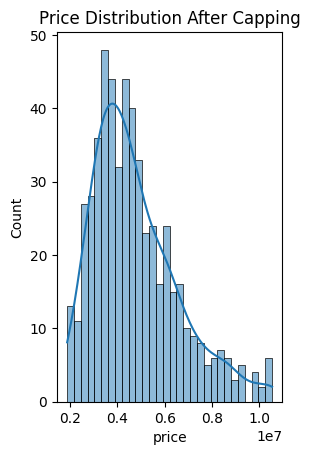

Number of outliers before capping: 0
Number of outliers after capping: 0


In [13]:
upper_limit = df['price'].quantile(0.99)
lower_limit = df['price'].quantile(0.01)
df['price'] = df['price'].clip(lower_limit, upper_limit)
print("\nStatistics After Capping:")
print(df['price'].describe())
plt.subplot(1, 2, 2)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution After Capping')
plt.show()
initial_outliers = df[df['price'] > upper_limit].shape[0] + df[df['price'] < lower_limit].shape[0]
print(f"Number of outliers before capping: {initial_outliers}")
post_capping_outliers = df[(df['price'] > upper_limit) | (df['price'] < lower_limit)].shape[0]
print(f"Number of outliers after capping: {post_capping_outliers}")

## Split Data

In [14]:
X = df.drop('price', axis=1)  # features
y = df['price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Correlation Matrix

In [15]:
cor_matrix = df.corr()
print("CORRELATION MATRIX")
print(cor_matrix)

CORRELATION MATRIX
                                    price      area  bedrooms  bathrooms  \
price                            1.000000  0.541033  0.368795   0.516247   
area                             0.541033  1.000000  0.151858   0.193820   
bedrooms                         0.368795  0.151858  1.000000   0.373930   
bathrooms                        0.516247  0.193820  0.373930   1.000000   
stories                          0.425905  0.083996  0.408564   0.326165   
mainroad                         0.302923  0.288874 -0.012033   0.042398   
guestroom                        0.266023  0.140297  0.080549   0.126469   
basement                         0.190239  0.047417  0.097312   0.102106   
hotwaterheating                  0.098168 -0.009229  0.046049   0.067159   
airconditioning                  0.458419  0.222393  0.160603   0.186915   
parking                          0.379432  0.352980  0.139270   0.177496   
prefarea                         0.330462  0.234779  0.079023   0.063

## Heatmap

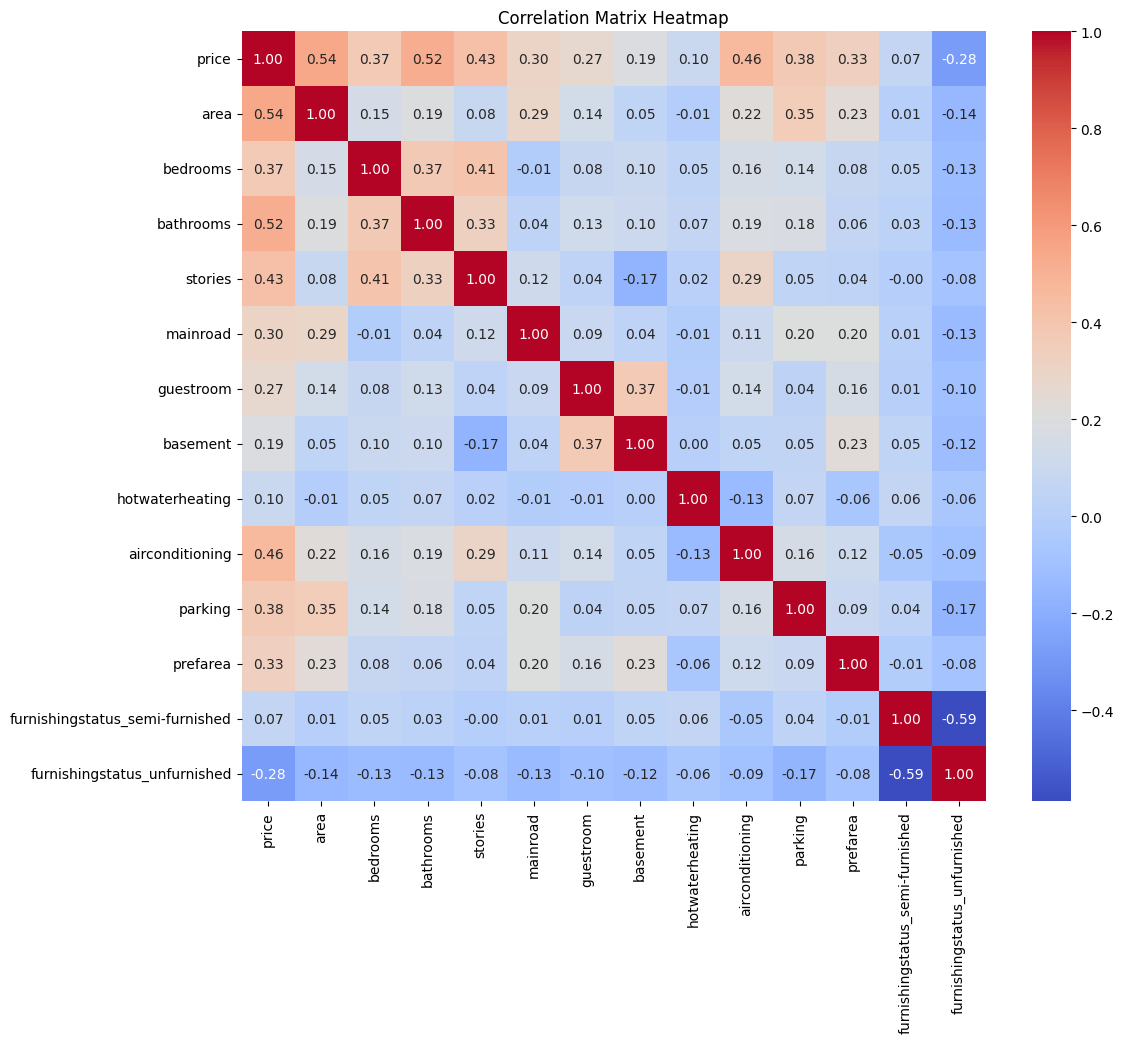

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, annot_kws={"size": 10}, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [17]:
df.to_csv('/Users/zaino/Desktop/preprocessed_housing_data.csv', index=False)


## Also save training and test sets for easy use in modeling


In [18]:
X_train.to_csv('/Users/zaino/Desktop/X_train.csv', index=False)
X_test.to_csv('/Users/zaino/Desktop/X_test.csv', index=False)
y_train.to_csv('/Users/zaino/Desktop/y_train.csv', index=False)
y_test.to_csv('/Users/zaino/Desktop/y_test.csv', index=False)


## Null Check

In [19]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64


## Covariance Matrix

COVARIANCE MATRIX
                   area    bedrooms   bathrooms     stories     parking
area       4.709512e+06  243.232140  211.346617  158.129368  659.989696
bedrooms   2.432321e+02    0.544738    0.138674    0.261589    0.088562
bathrooms  2.113466e+02    0.138674    0.252476    0.142171    0.076842
stories    1.581294e+02    0.261589    0.142171    0.752543    0.034043
parking    6.599897e+02    0.088562    0.076842    0.034043    0.742330


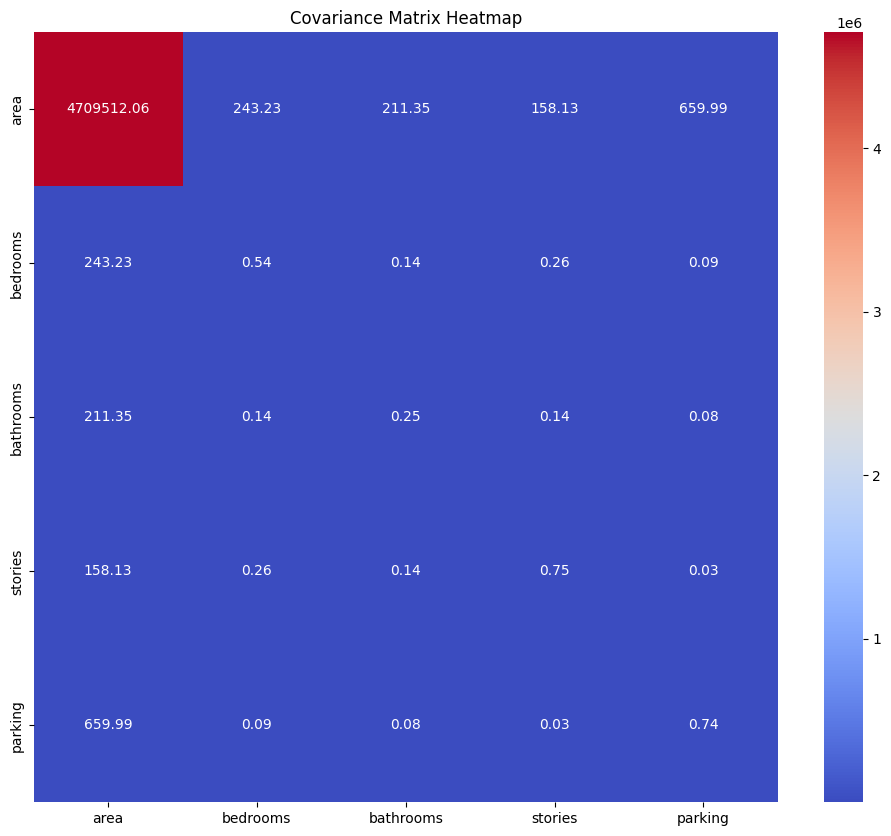

In [20]:
attributes = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
data_attributes = df[attributes]
covariance_matrix = np.cov(data_attributes, rowvar=False)
covariance_df = pd.DataFrame(covariance_matrix, index=attributes, columns=attributes)
print("COVARIANCE MATRIX")
print(covariance_df)
plt.figure(figsize=(12, 10))
sns.heatmap(covariance_df, annot=True, annot_kws={"size": 10}, cmap='coolwarm', fmt='.2f')
plt.title('Covariance Matrix Heatmap')
plt.show()

## Unique Value Counts

In [21]:
for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for price:
price
4200000.0    17
3500000.0    17
4900000.0    12
3640000.0     9
5600000.0     9
             ..
5285000.0     1
5320000.0     1
5383000.0     1
5390000.0     1
4865000.0     1
Name: count, Length: 212, dtype: int64


Value counts for area:
area
6000    24
3000    14
4500    13
4000    11
5500     9
        ..
6862     1
4815     1
9166     1
6321     1
3620     1
Name: count, Length: 284, dtype: int64


Value counts for bedrooms:
bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64


Value counts for bathrooms:
bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64


Value counts for stories:
stories
2    238
1    227
4     41
3     39
Name: count, dtype: int64


Value counts for mainroad:
mainroad
1    468
0     77
Name: count, dtype: int64


Value counts for guestroom:
guestroom
0    448
1     97
Name: count, dtype: int64


Value counts for basement:
basement
0    354
1    191
Name: count, dtype: int64

## Histograms

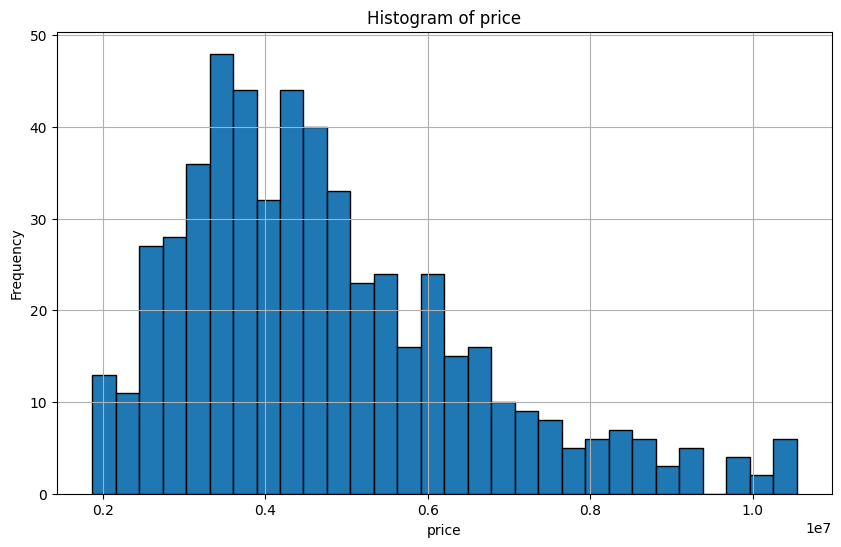

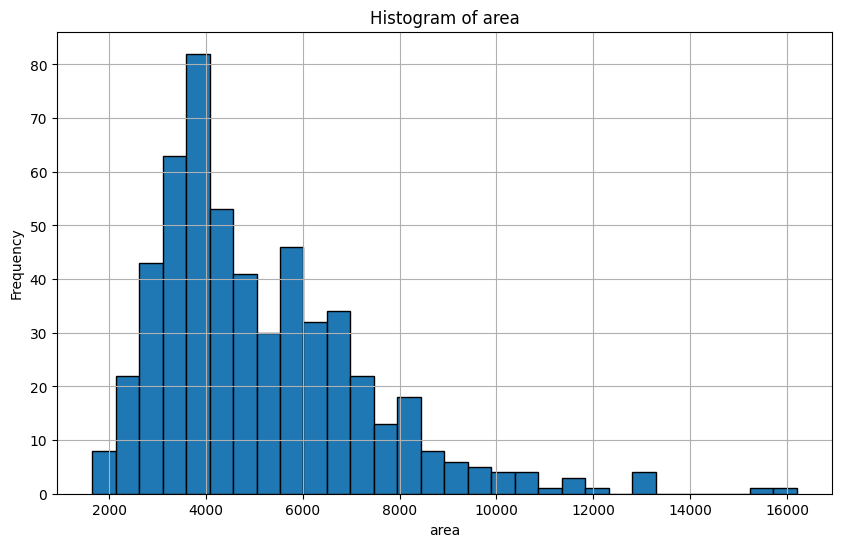

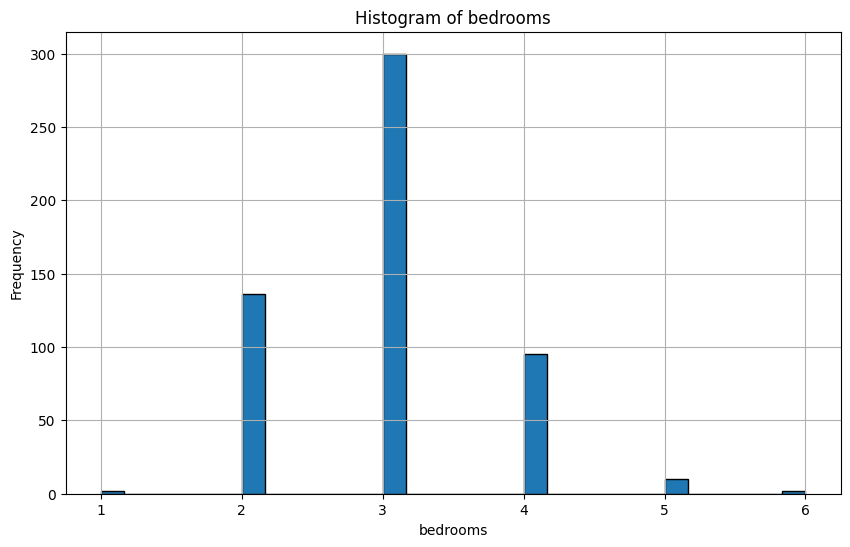

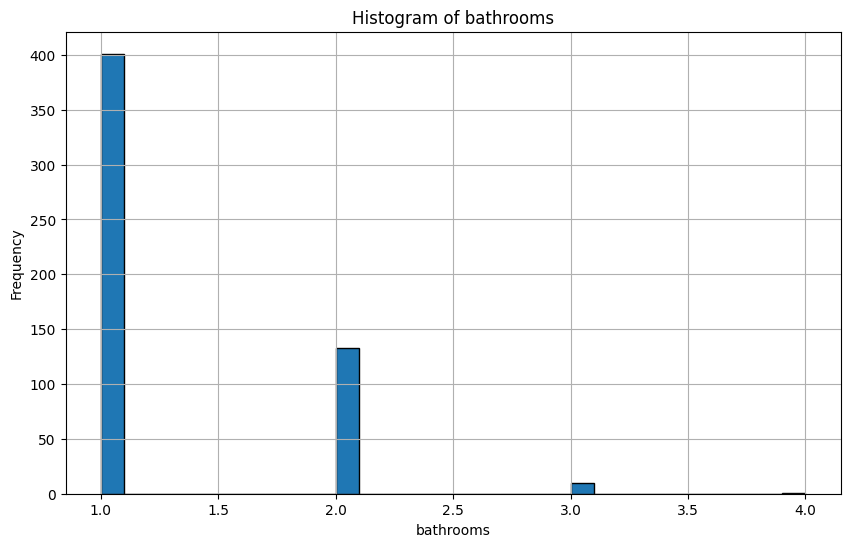

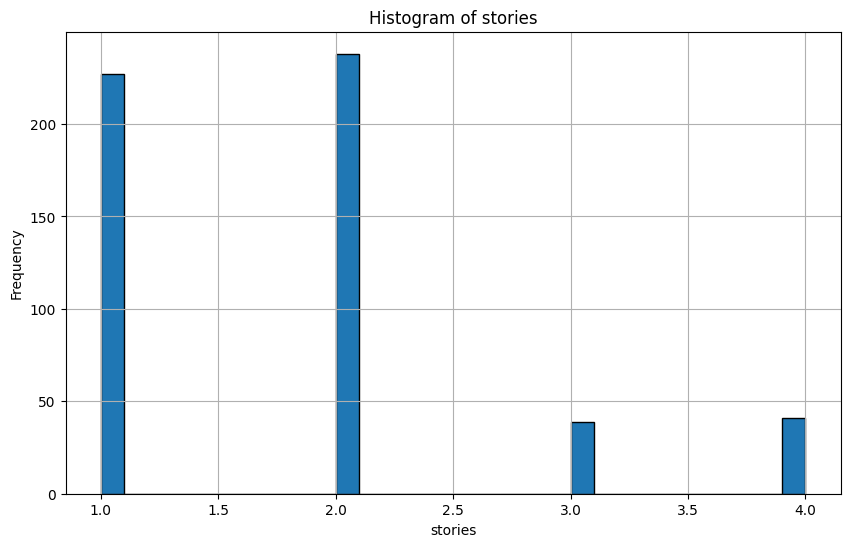

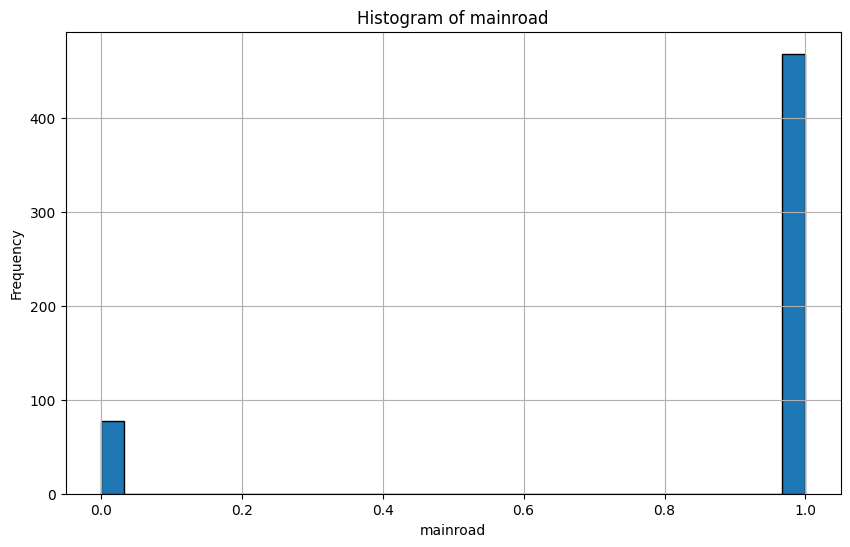

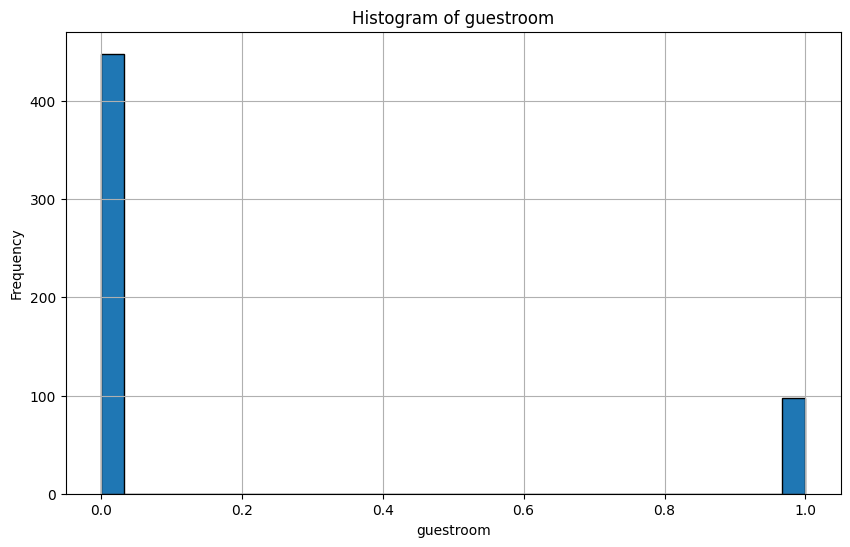

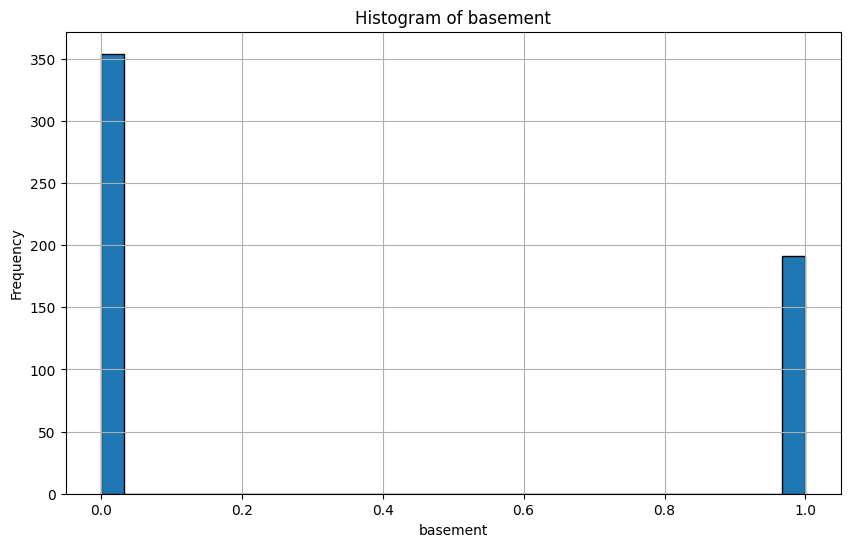

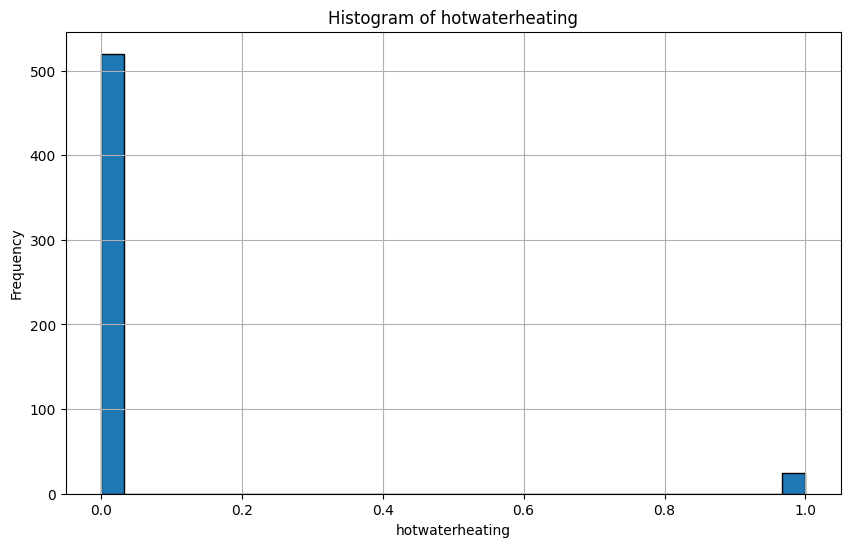

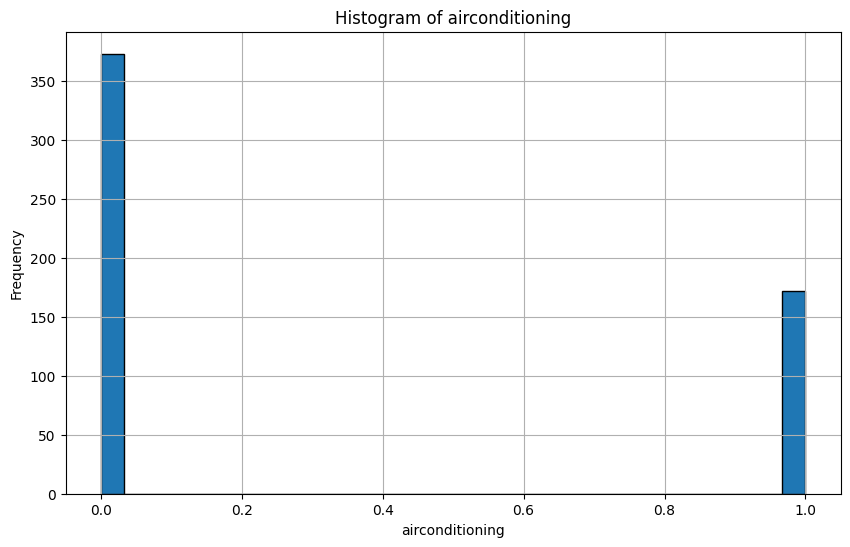

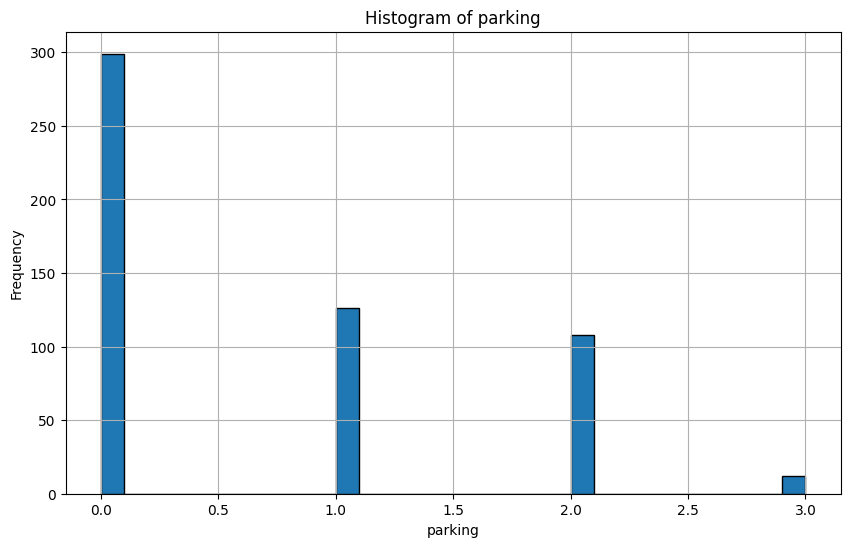

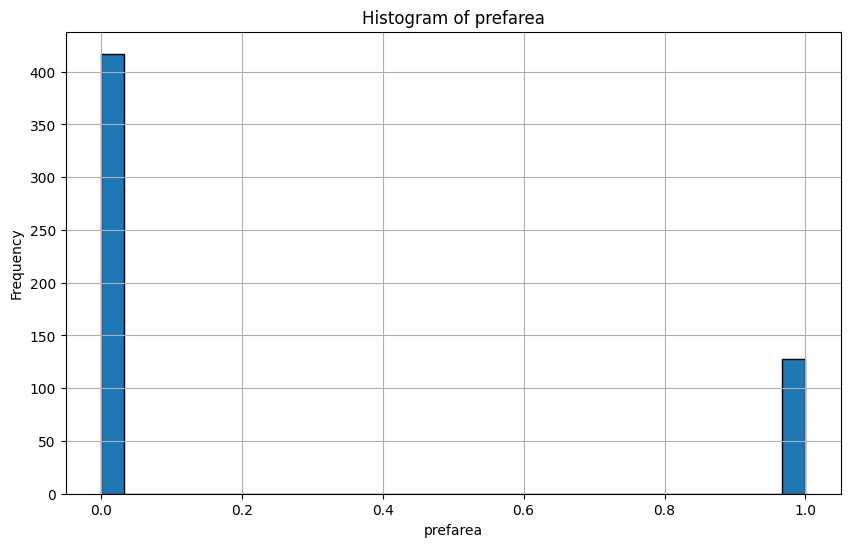

In [22]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Some Scatterplots

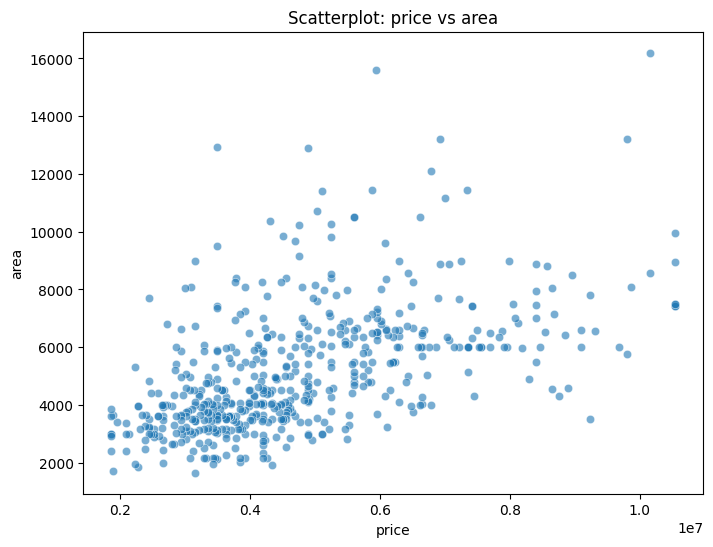

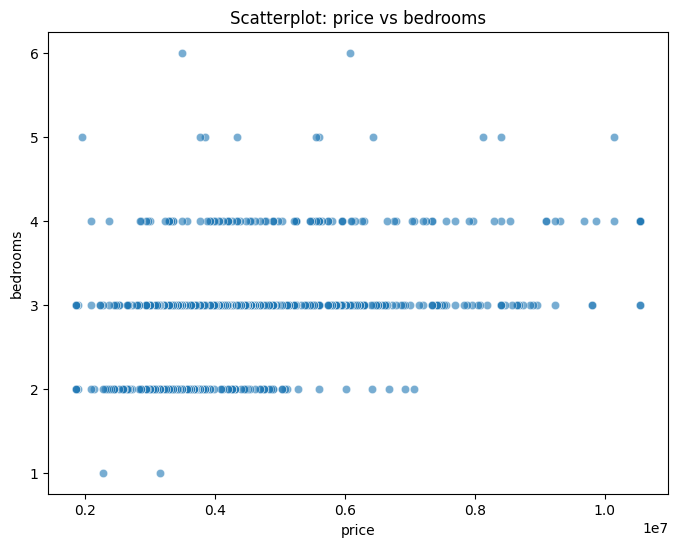

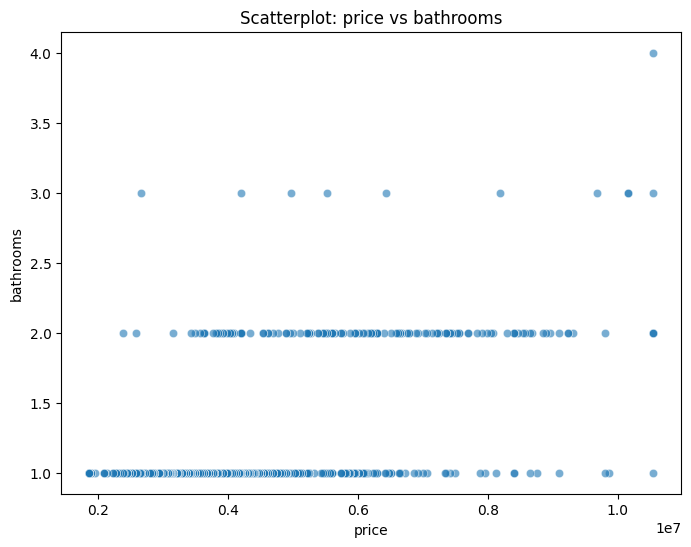

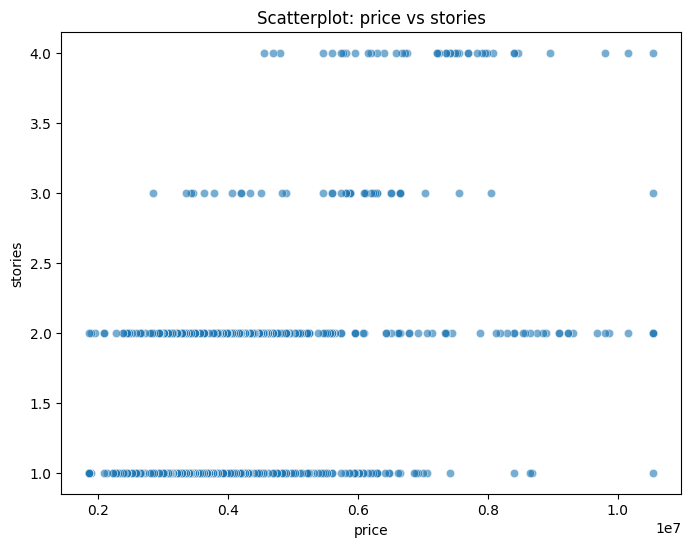

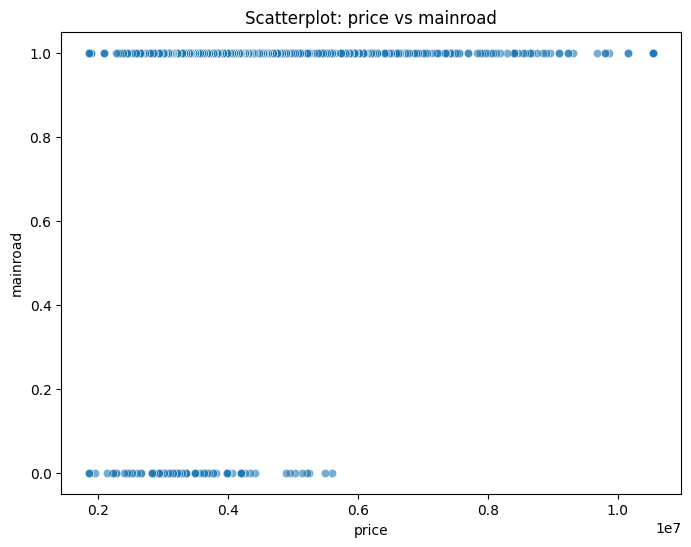

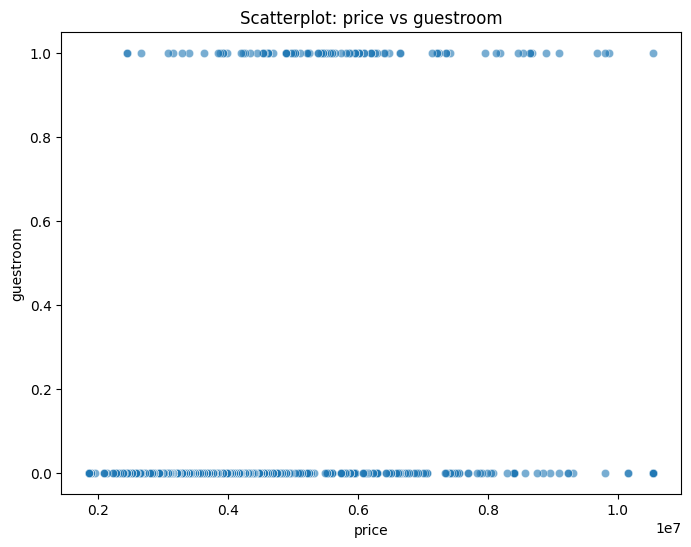

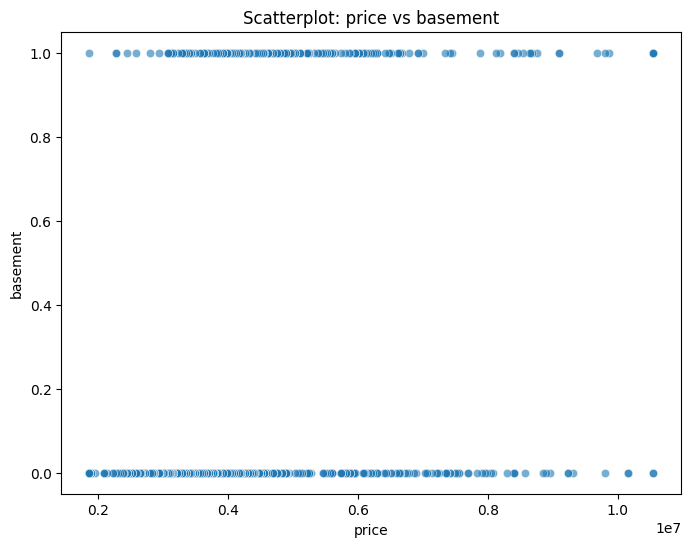

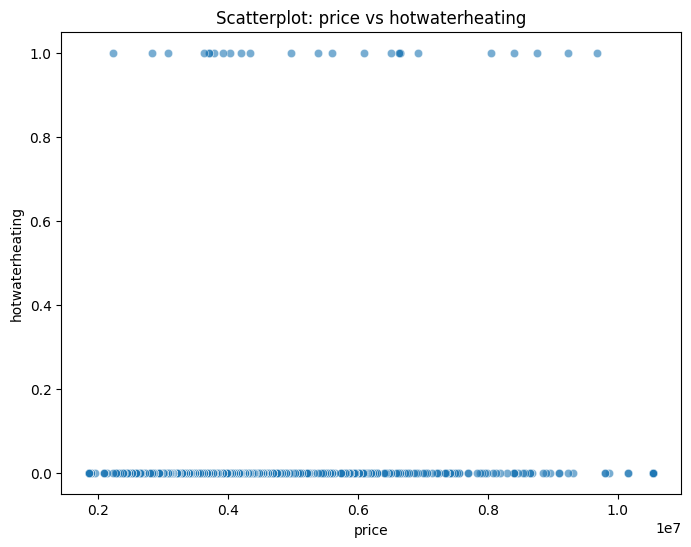

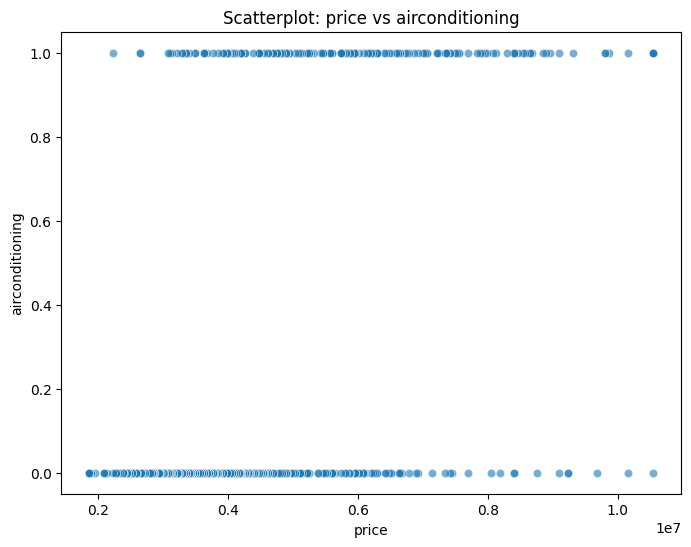

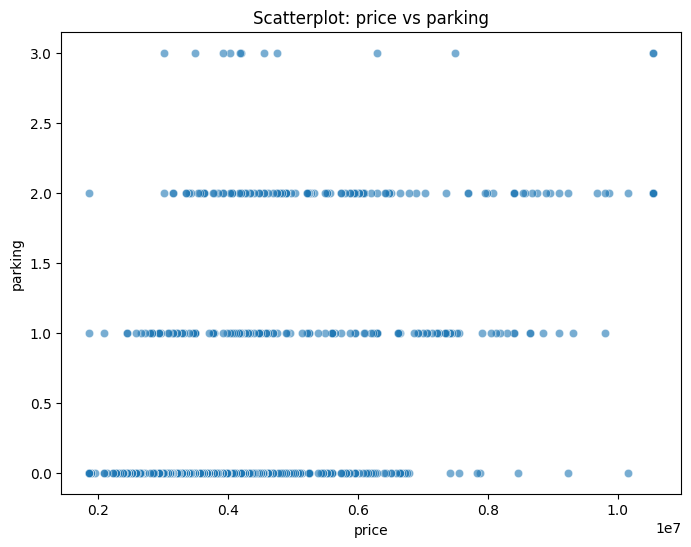

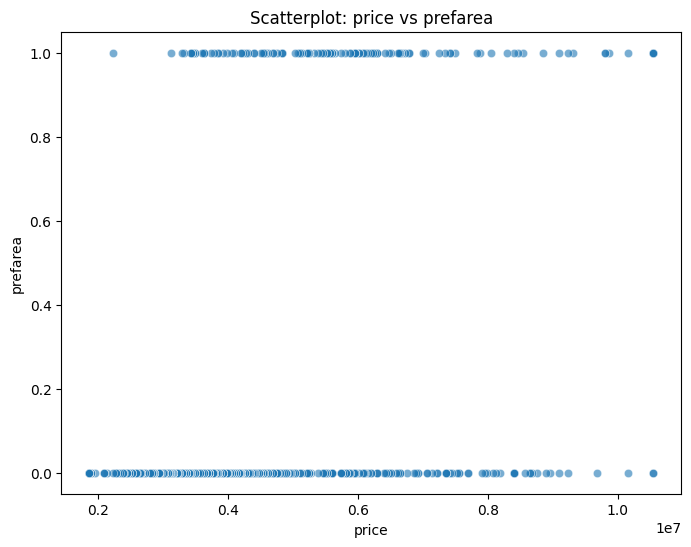

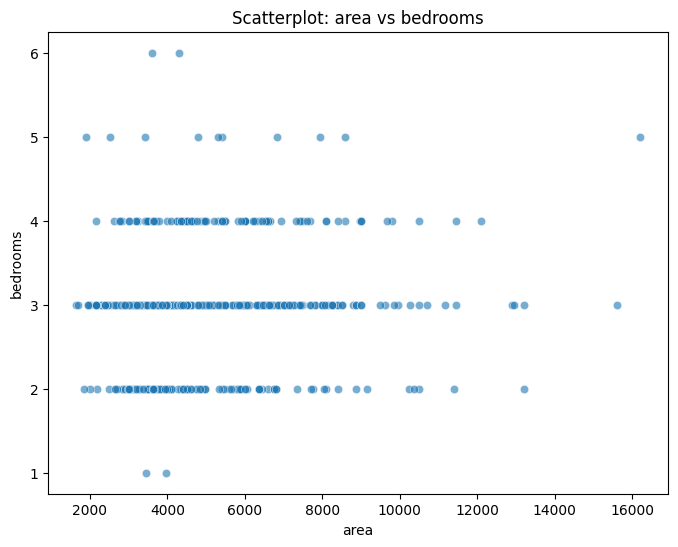

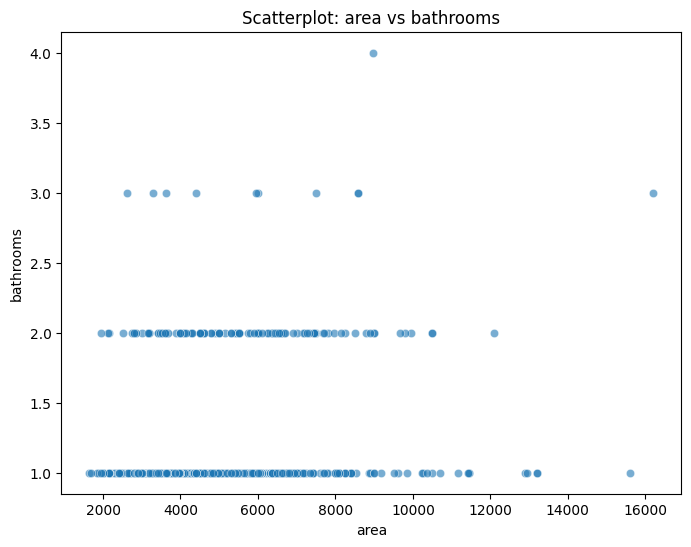

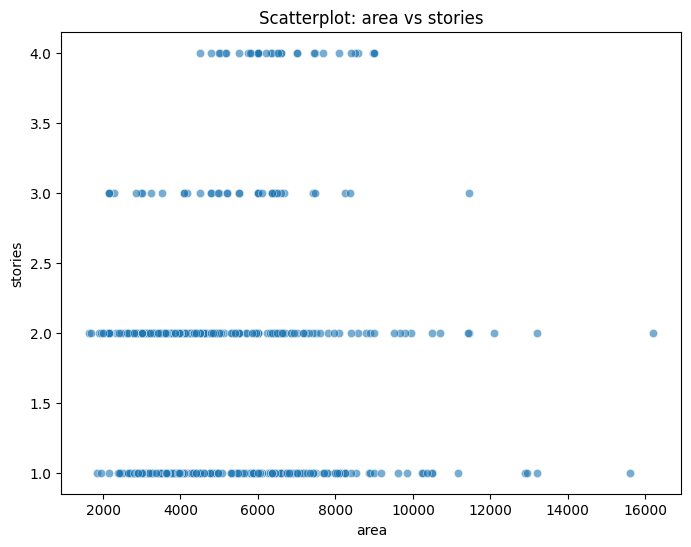

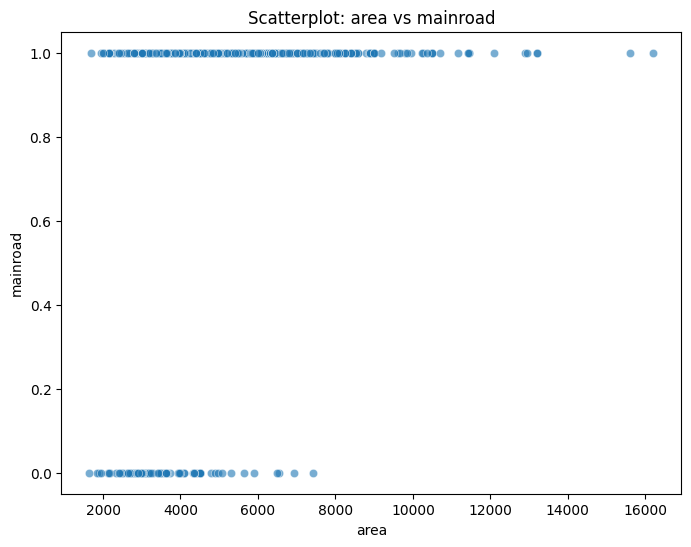

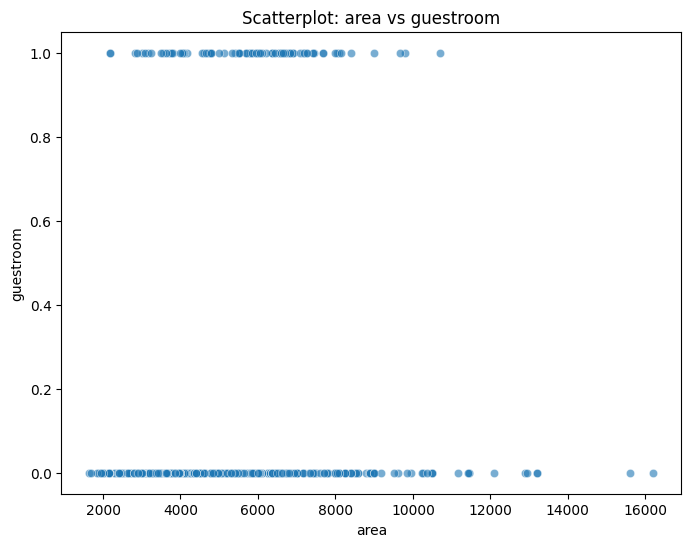

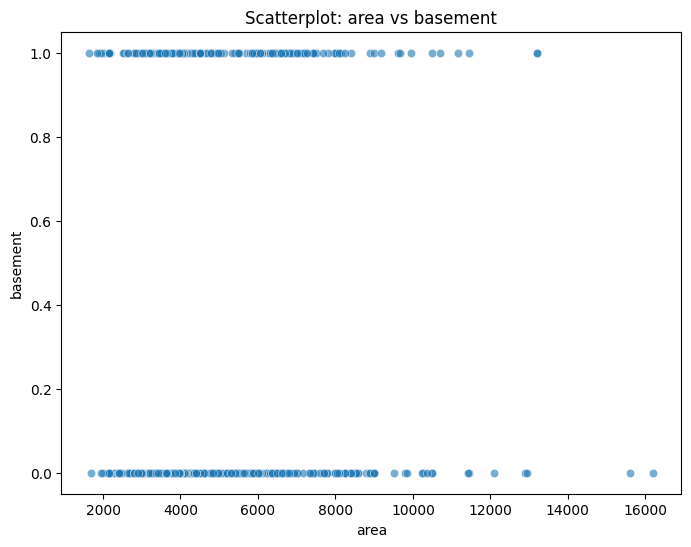

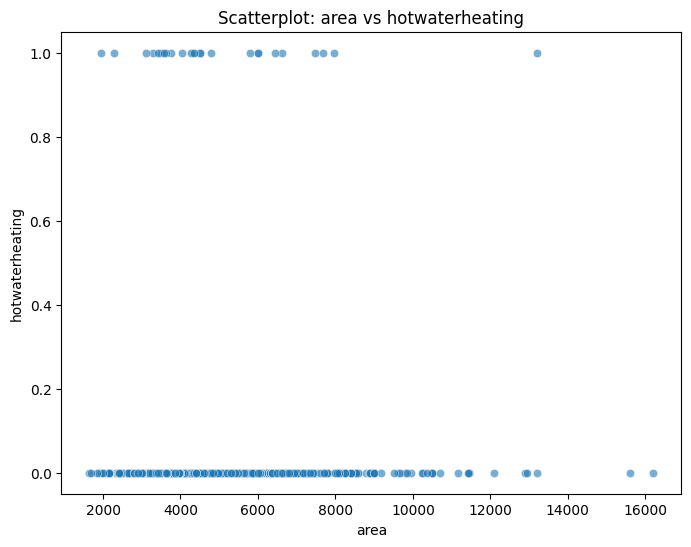

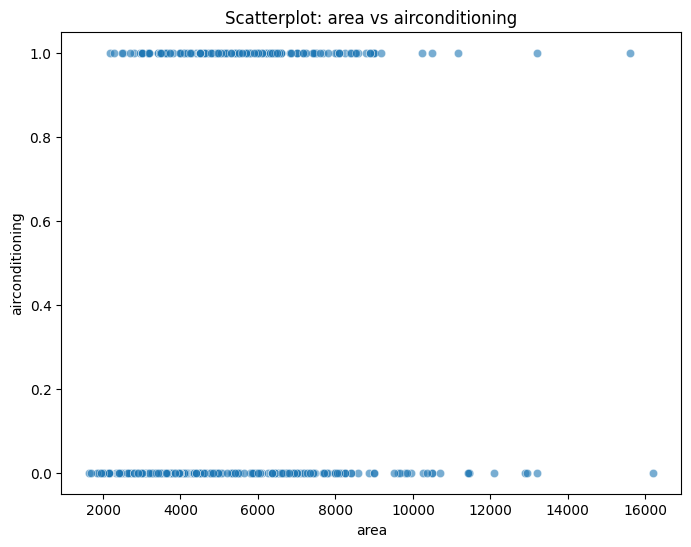

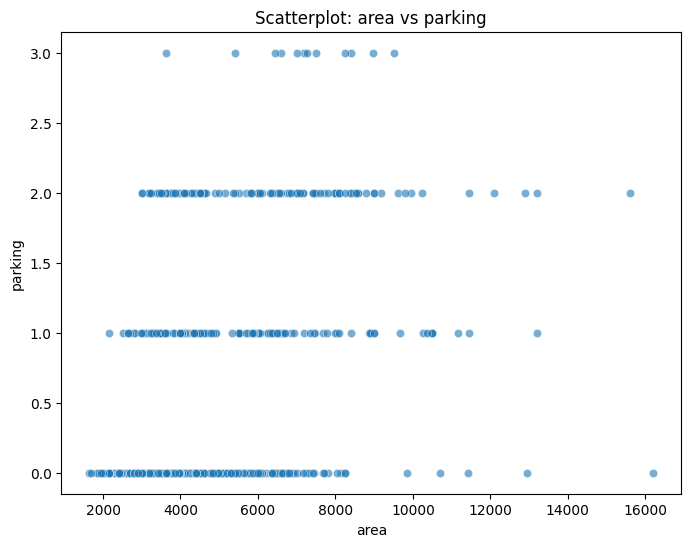

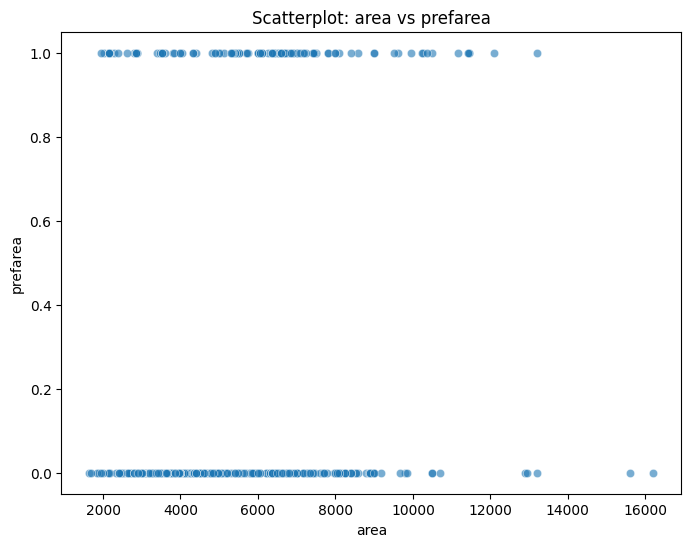

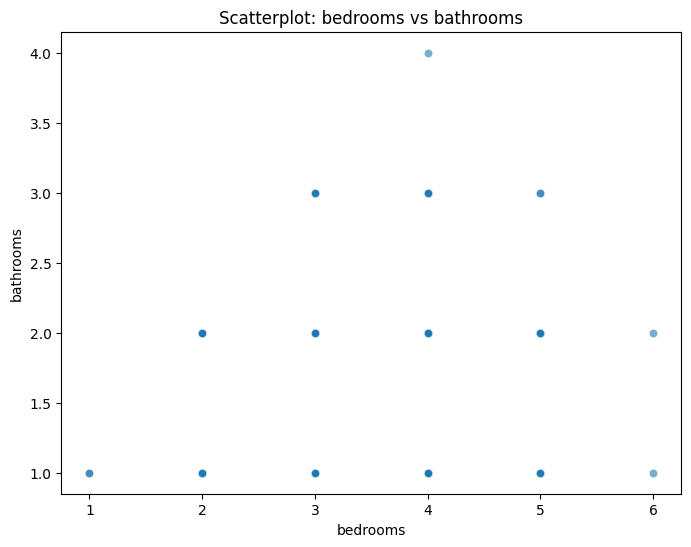

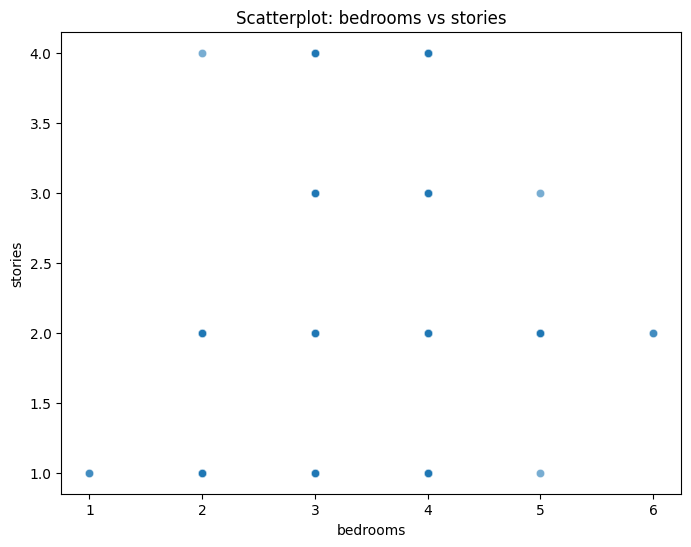

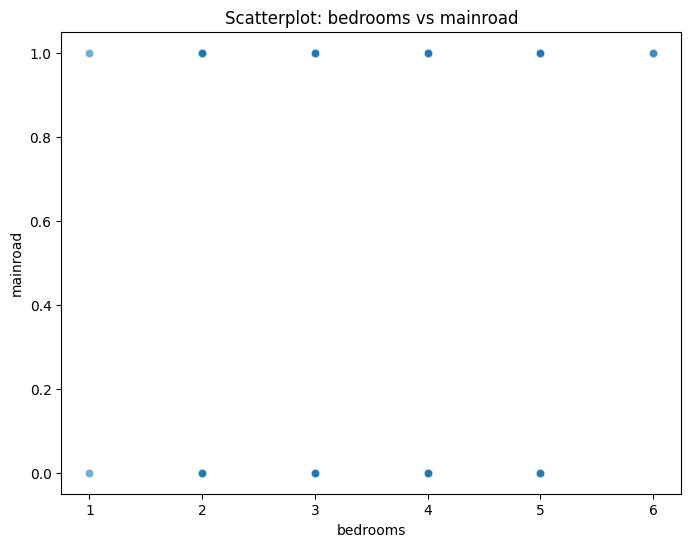

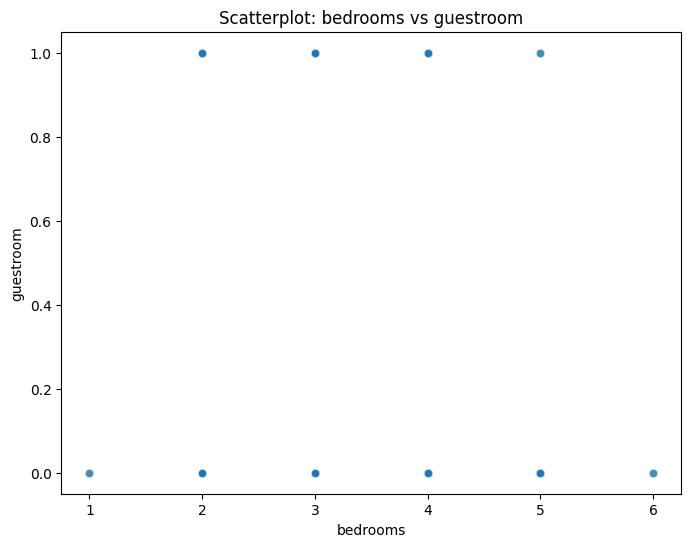

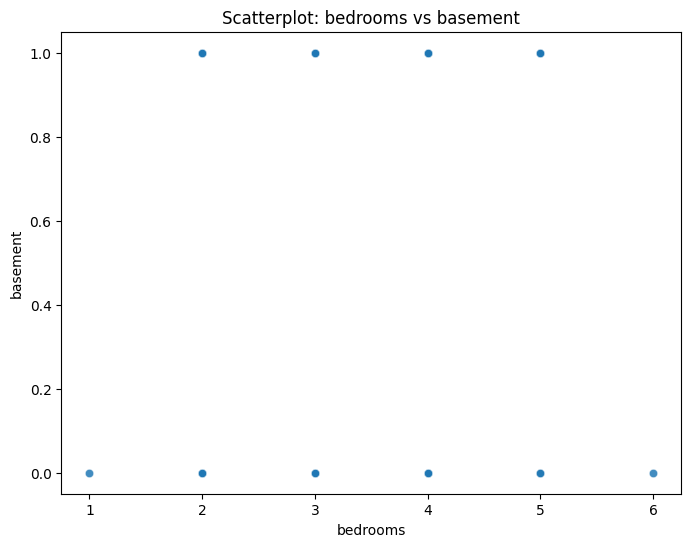

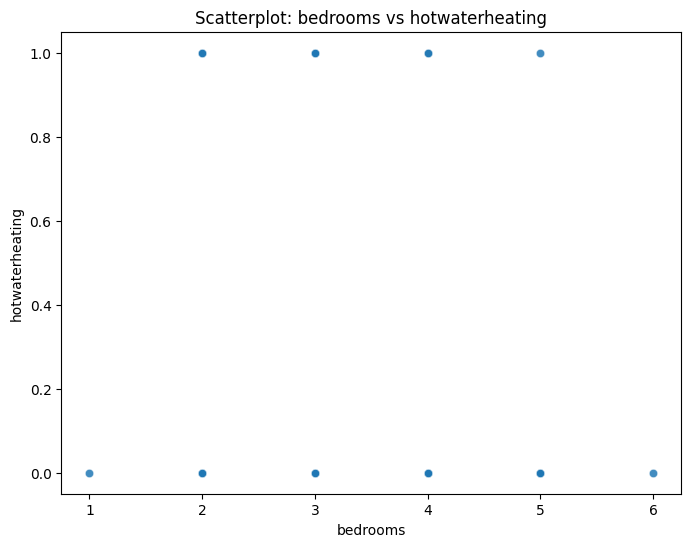

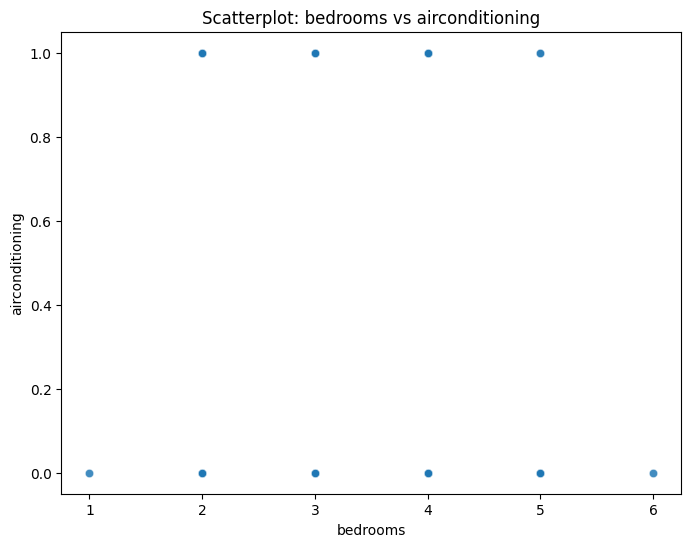

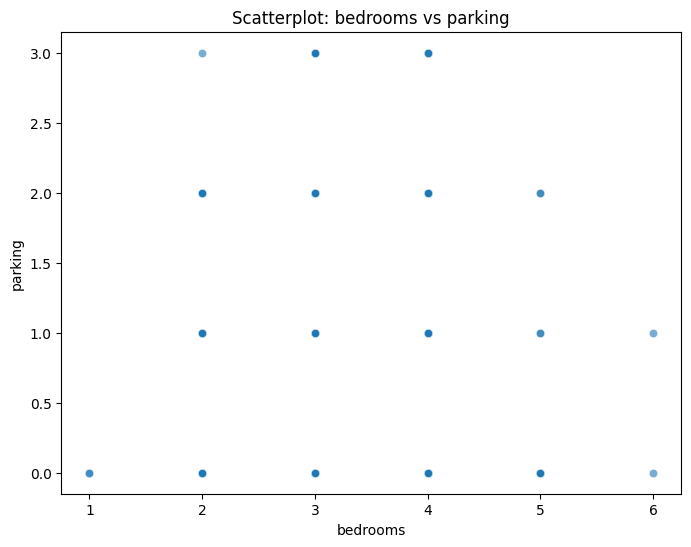

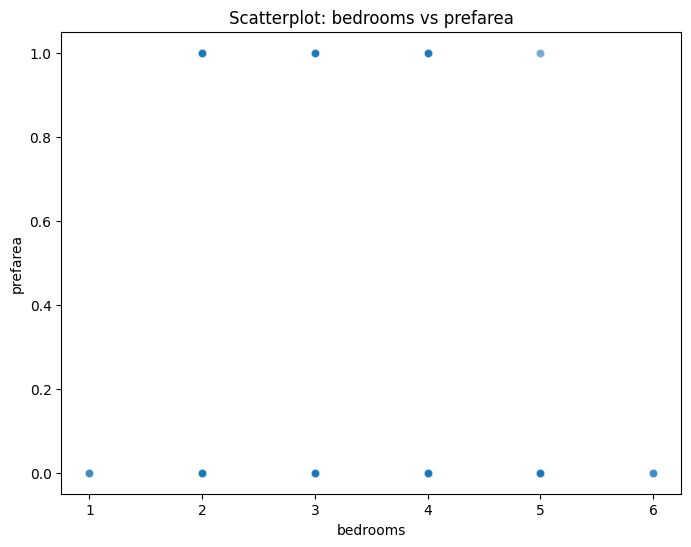

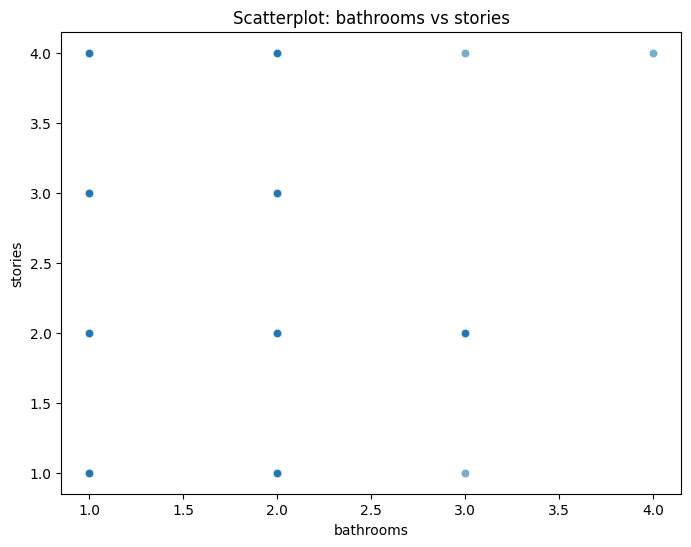

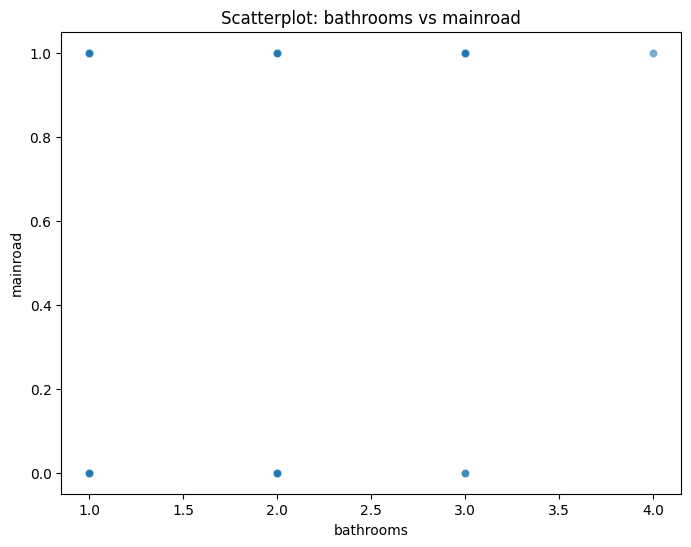

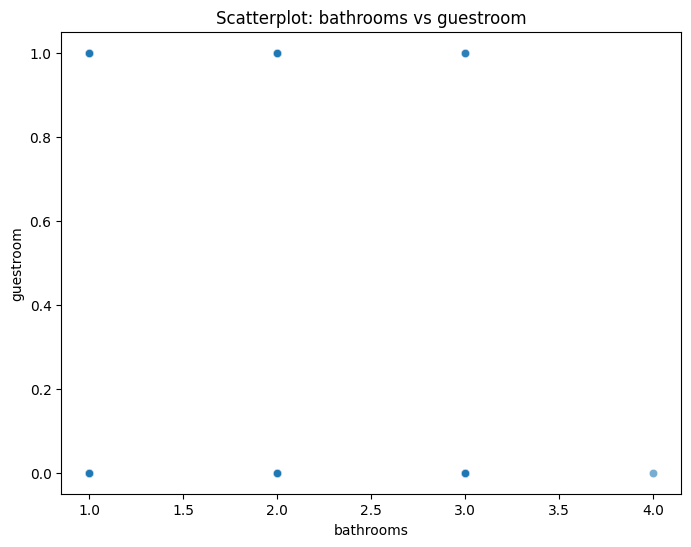

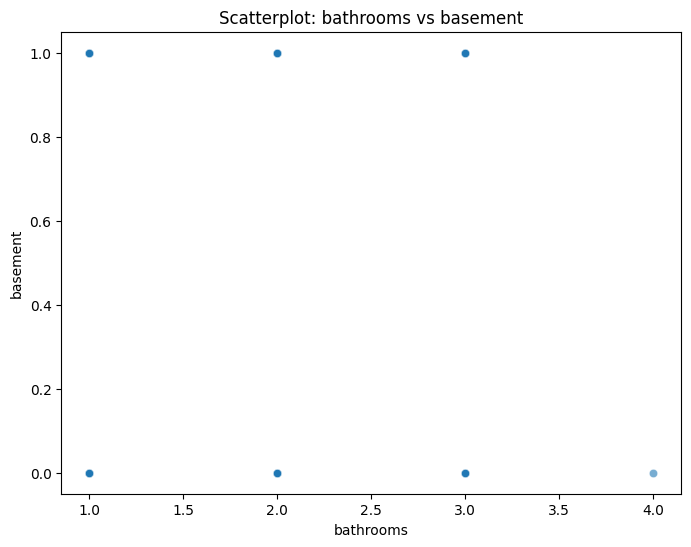

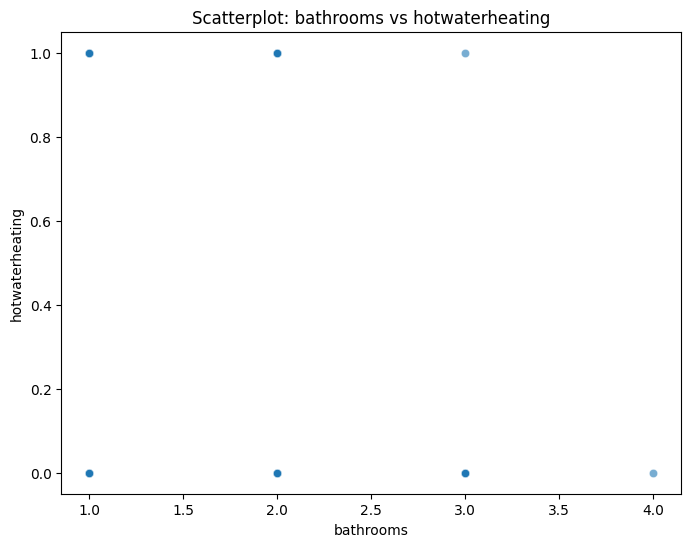

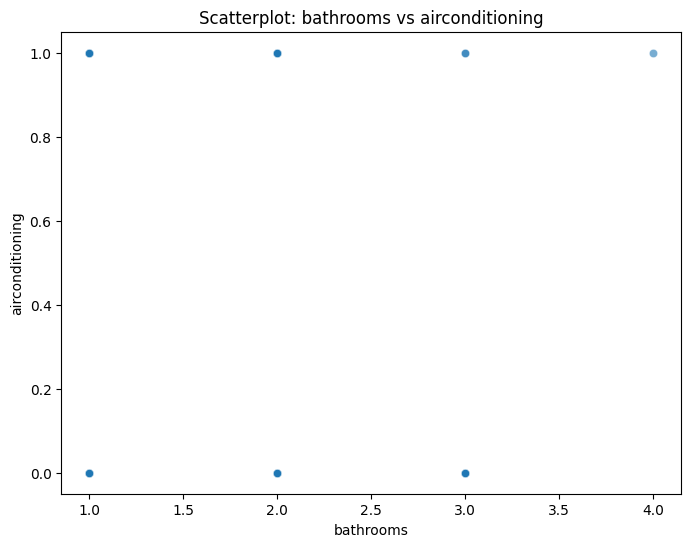

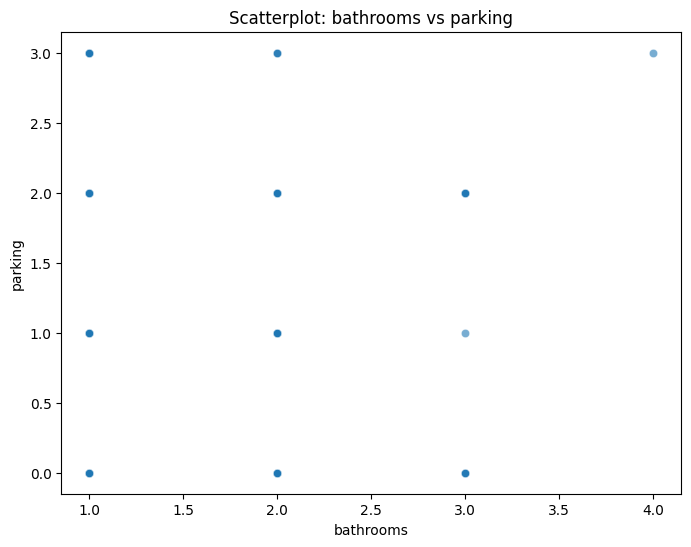

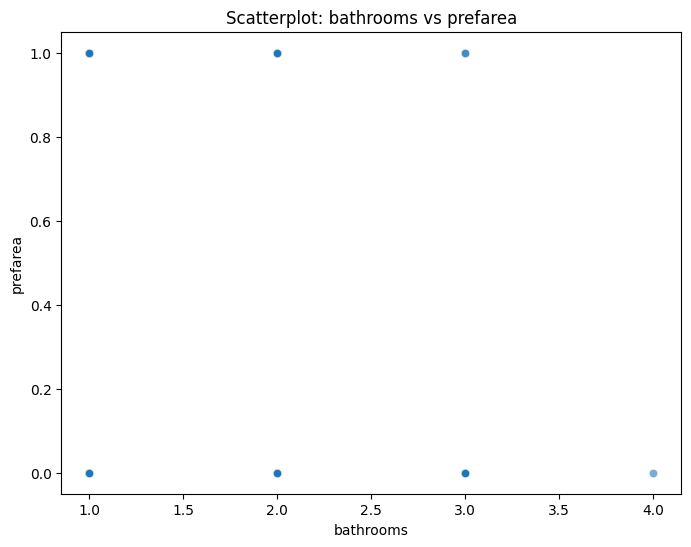

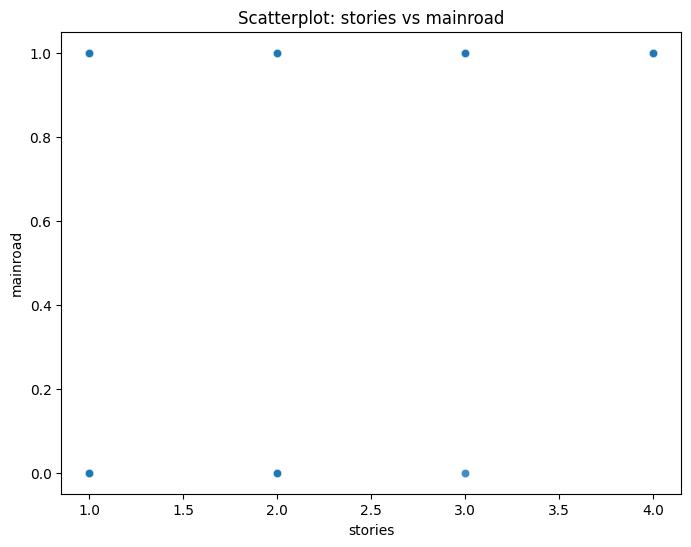

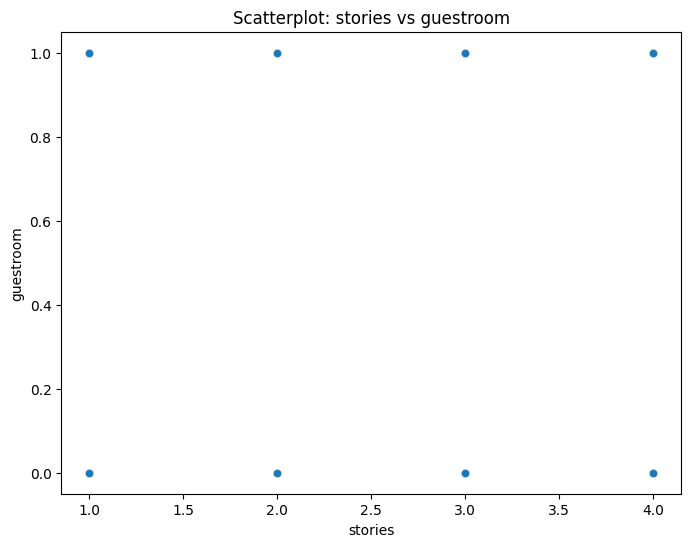

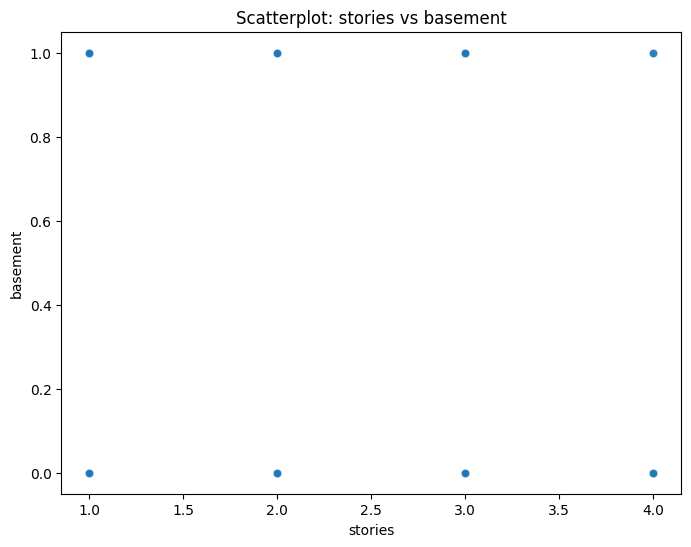

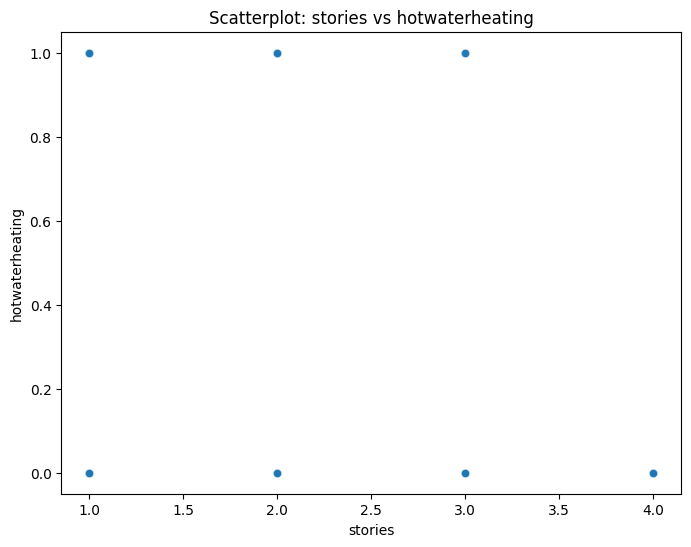

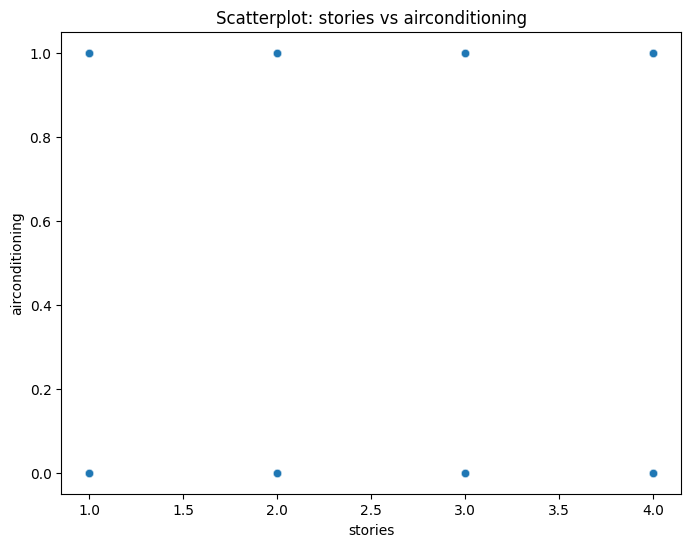

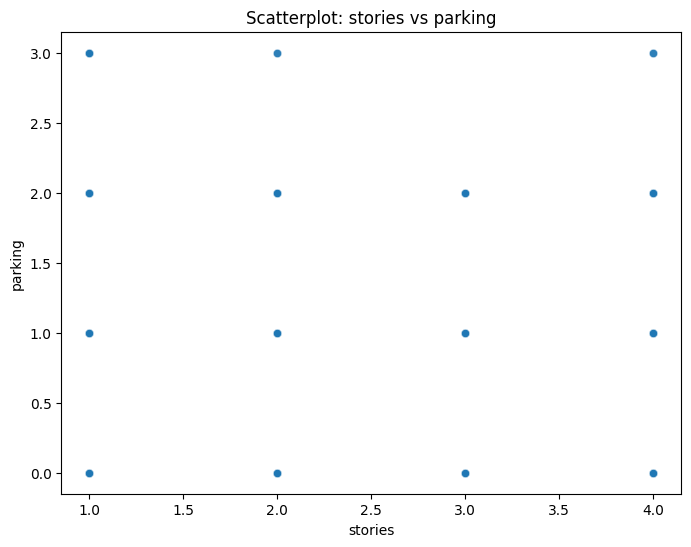

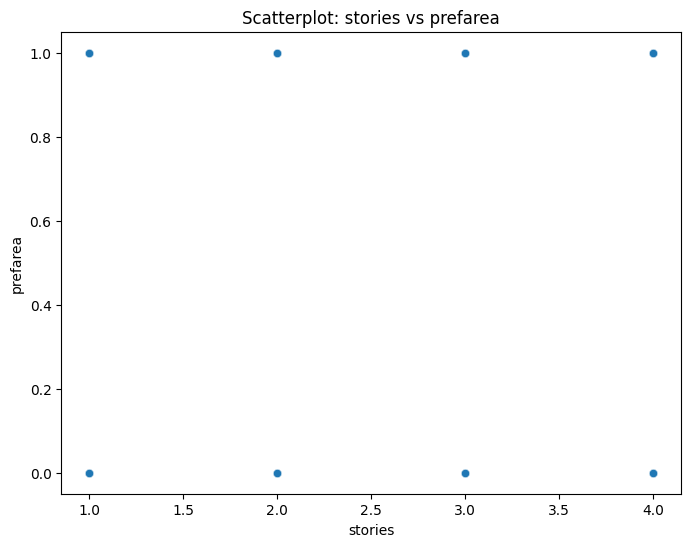

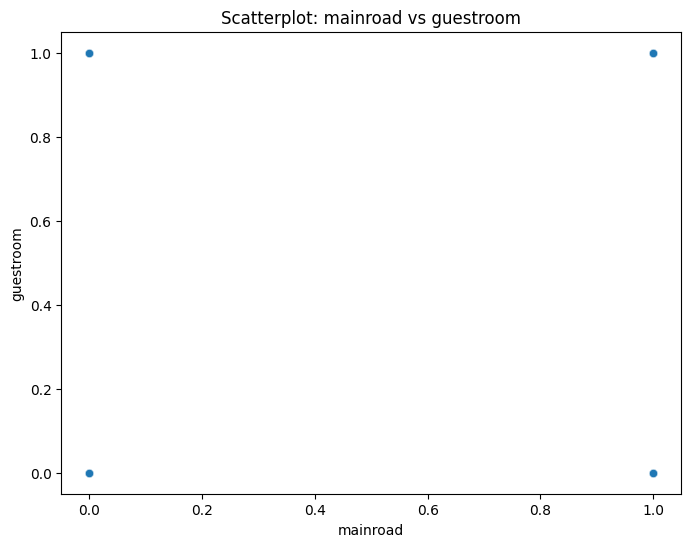

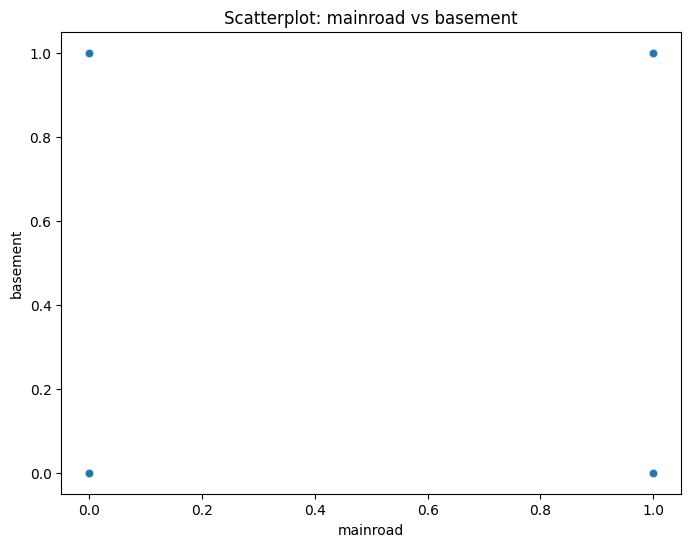

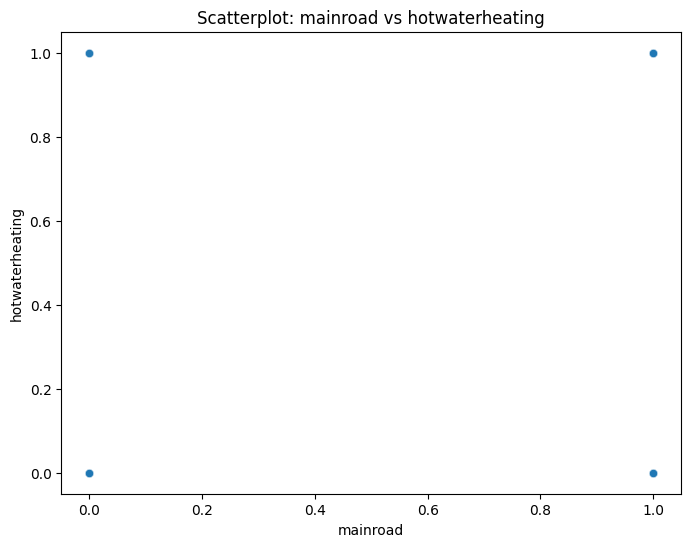

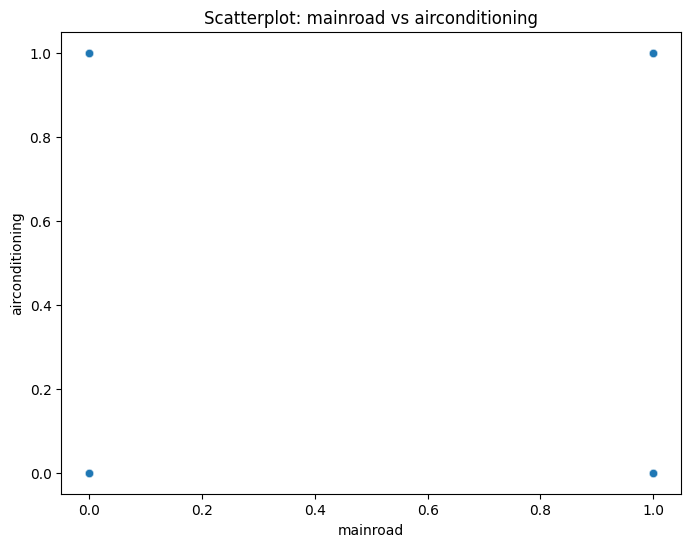

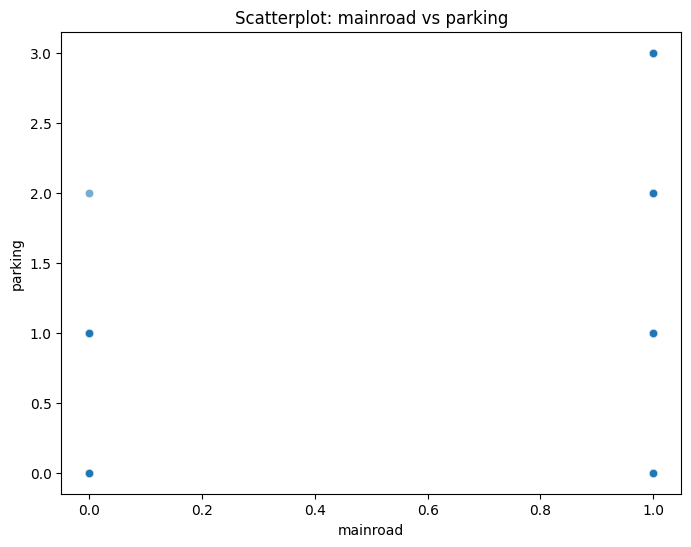

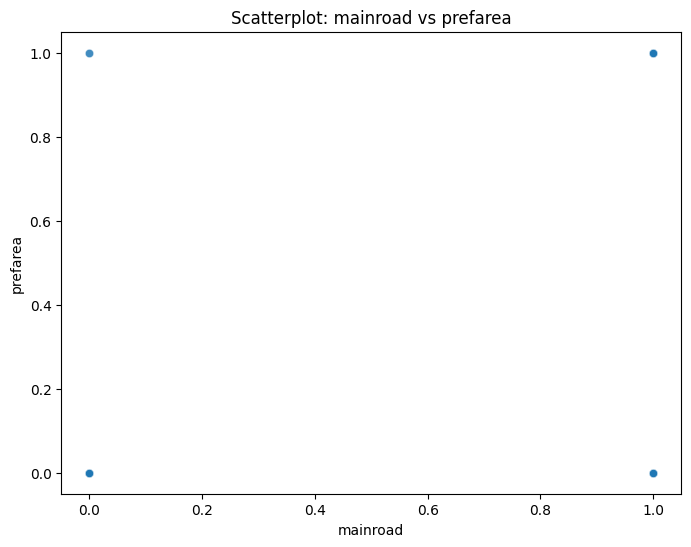

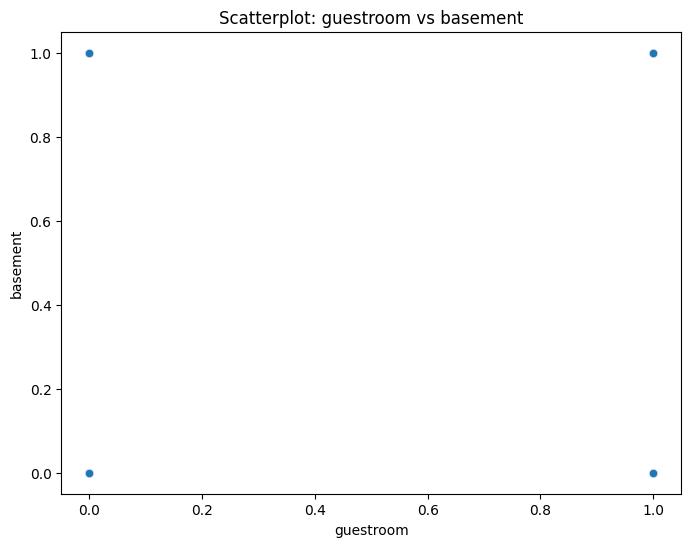

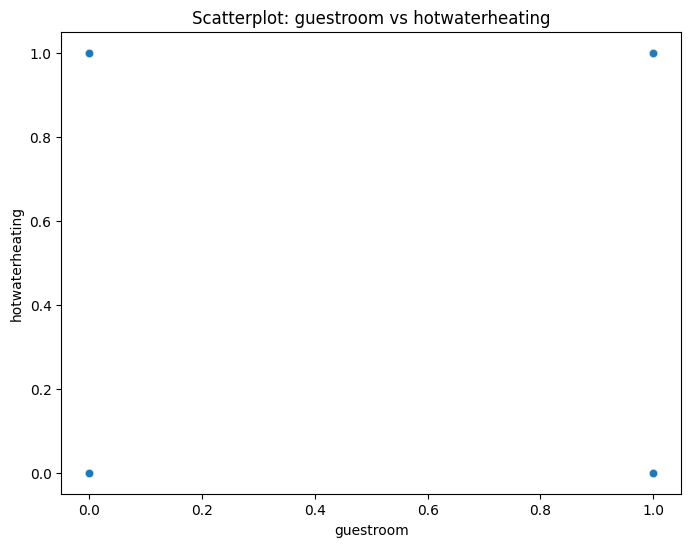

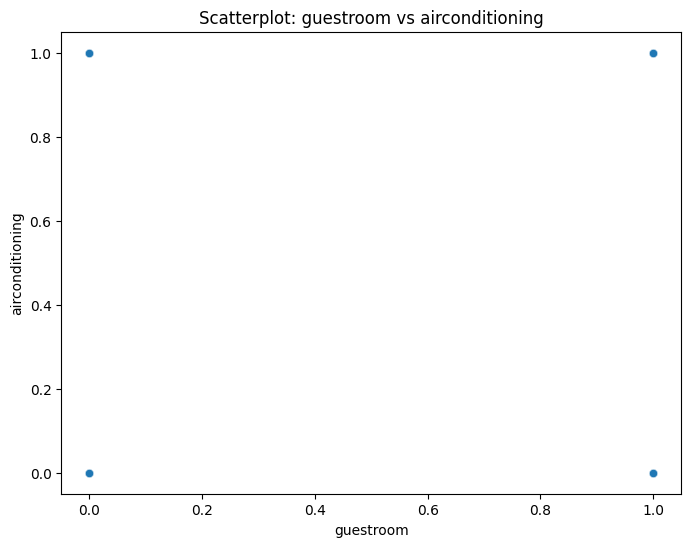

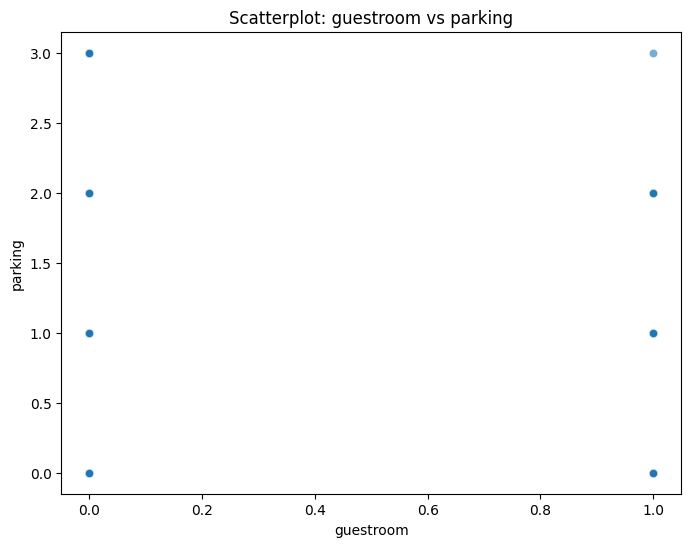

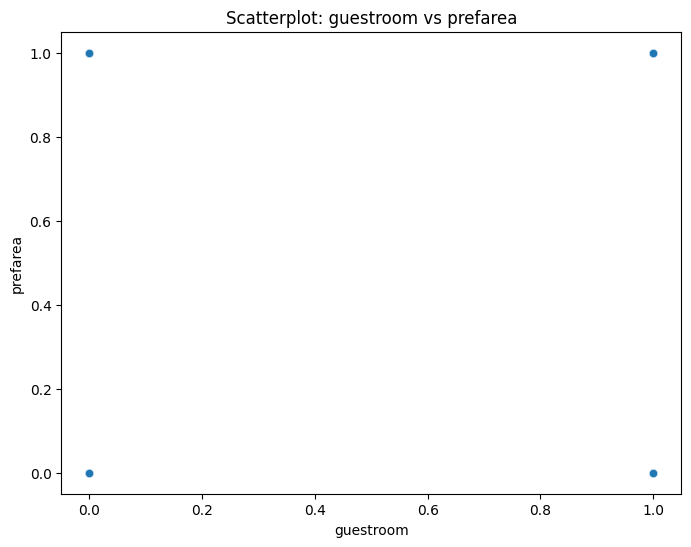

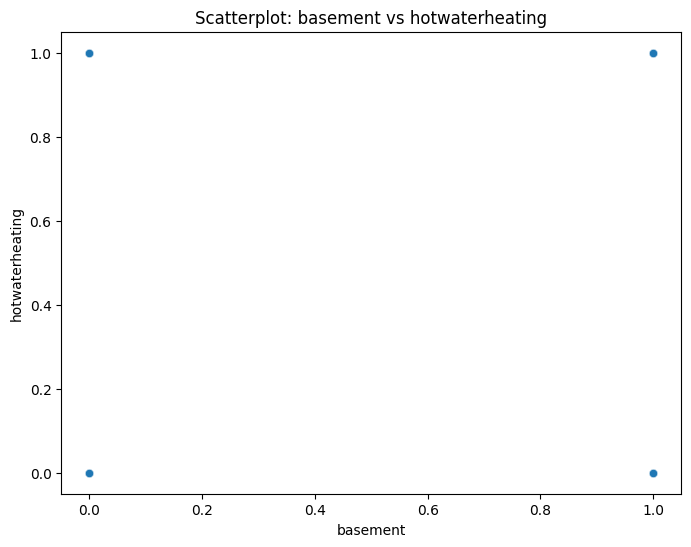

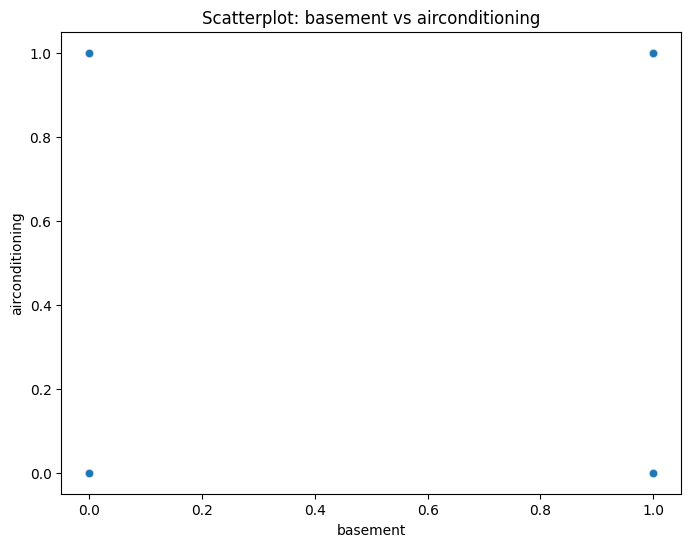

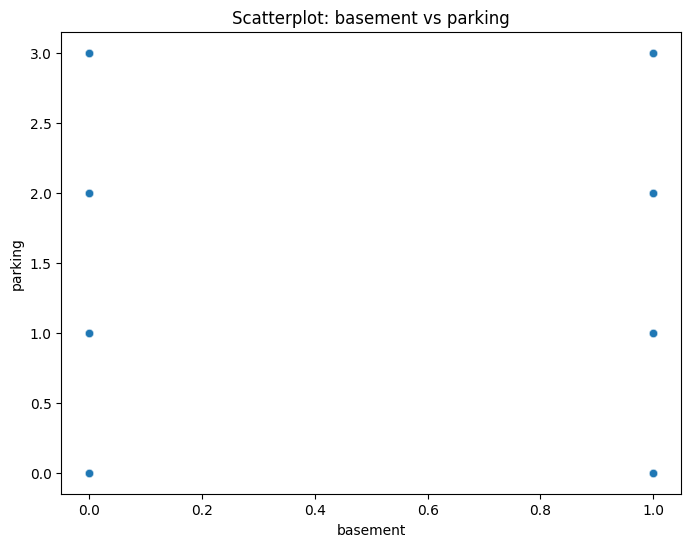

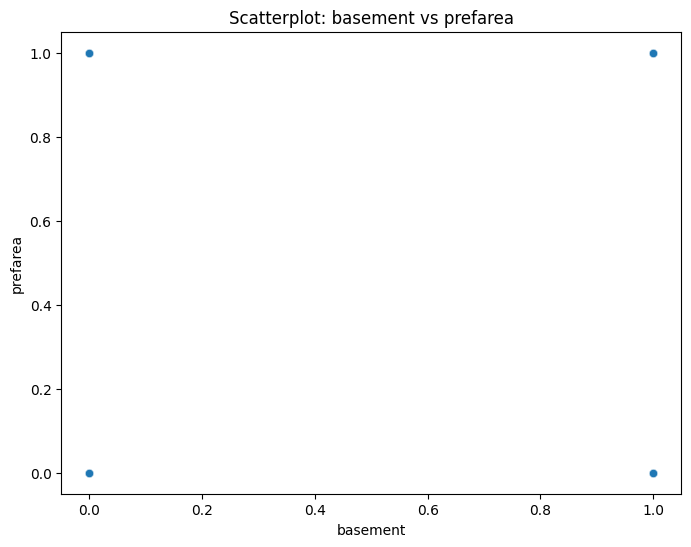

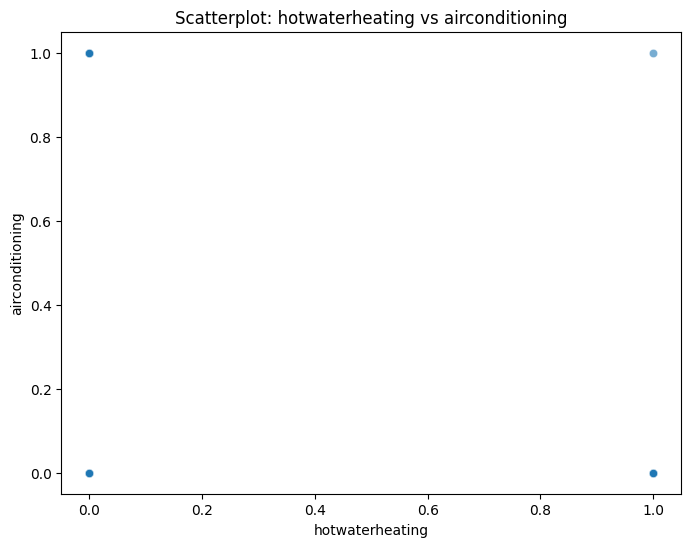

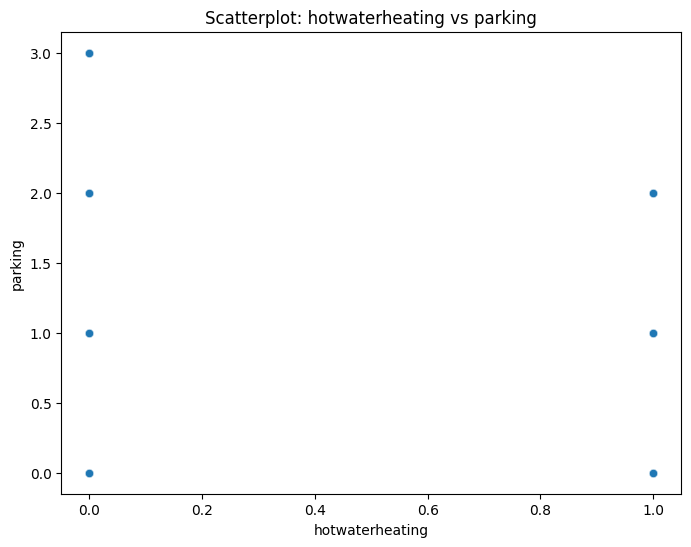

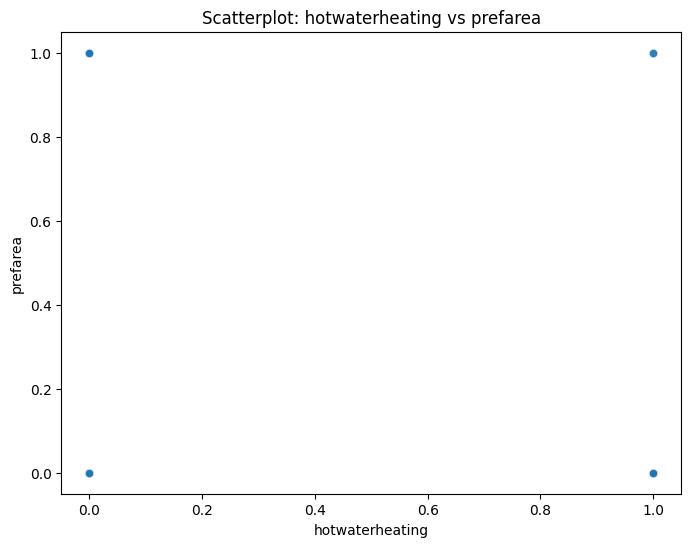

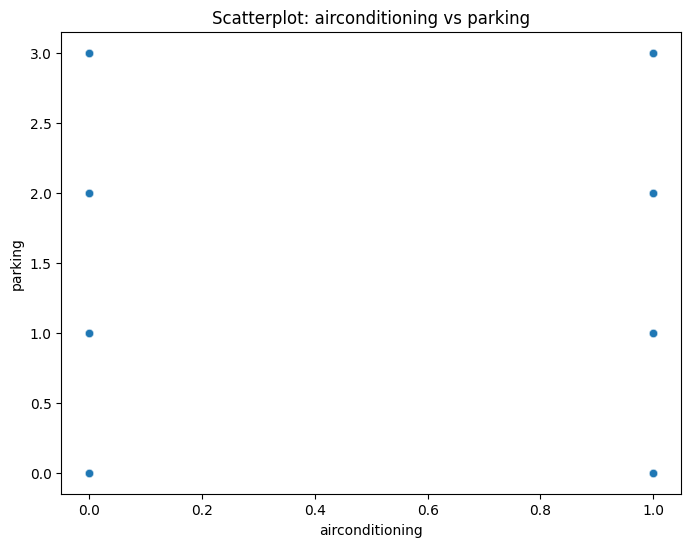

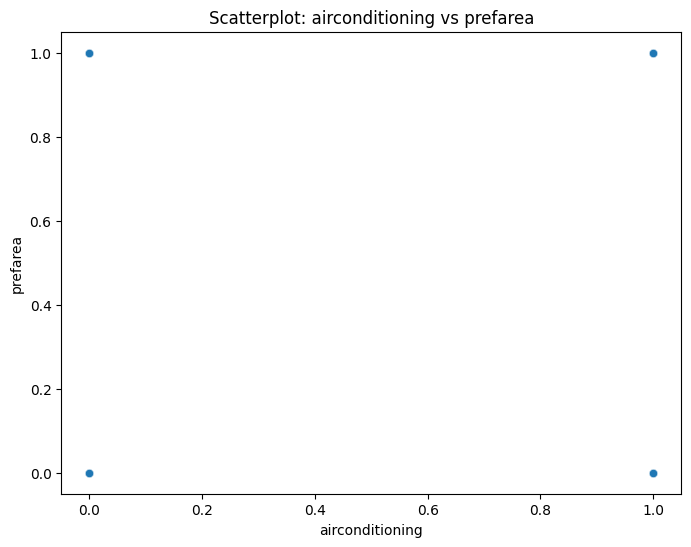

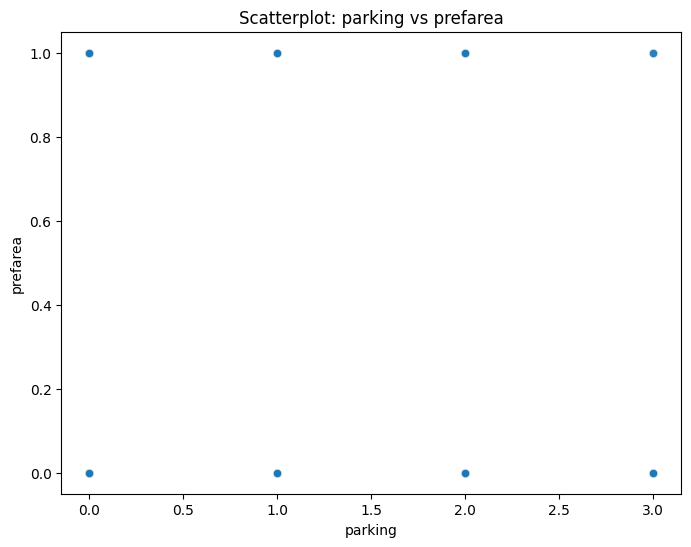

In [23]:
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        x_col = numerical_columns[i]
        y_col = numerical_columns[j]
        
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[x_col], y=df[y_col], alpha=0.6)
        plt.title(f'Scatterplot: {x_col} vs {y_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()

# Algorithms 

## 1.Linear Regression 

In [24]:
X = df.drop('price', axis=1)
y = df['price']

### Split the data


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Creation and Training

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Prediction Making

In [27]:
y_pred = model.predict(X_test)


## Model Evaluation

In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [29]:
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 1435693576568.4
Root Mean Squared Error (RMSE): 1198204.3133657966
R-squared: 0.6804570274792692


## Visualisation

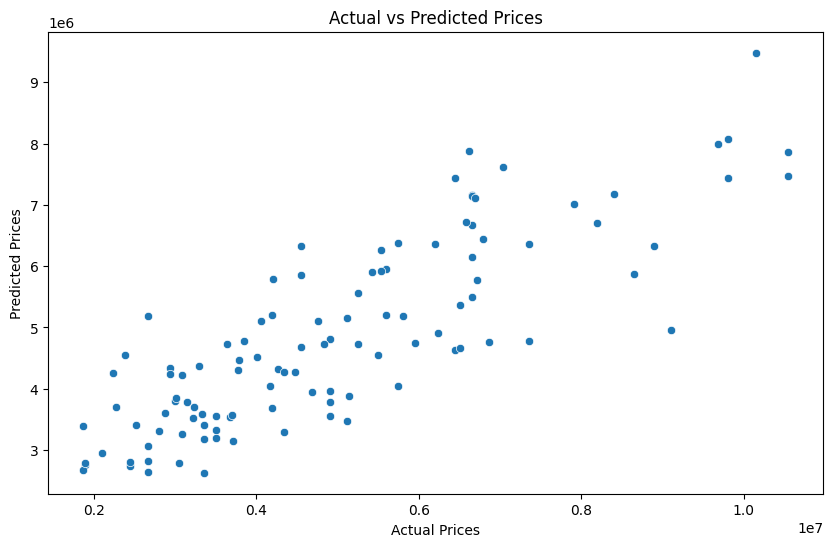

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

## 2. KNN

In [31]:
X = df.drop('price', axis=1)
y = df['price']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 2760621637989.9023
Root Mean Squared Error (RMSE): 1661511.8530994302
R-squared: 0.3855671860587201


### Visualisation

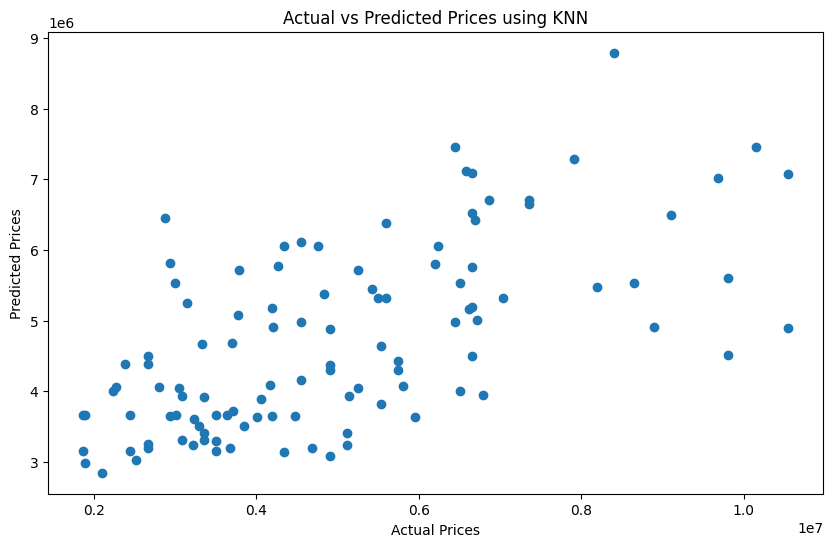

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices using KNN')
plt.show()

# 3. Naives-Bayes

### Conversion of Regression Problem to Classification Problem

In [35]:
price_bins = [0, 3_000_000, 5_000_000, 7_000_000, np.inf]  
price_labels = ['Low', 'Medium', 'High', 'Very High']  
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

# Prepare features and target variable for classification
X = df.drop(['price', 'price_category'], axis=1)
y = df['price_category']


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [38]:
y_pred_nb = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_classification_report = classification_report(y_test, y_pred_nb)
nb_confusion_matrix = confusion_matrix(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb, average='macro')
nb_recall = recall_score(y_test, y_pred_nb, average='macro')
nb_f1 = f1_score(y_test, y_pred_nb, average='macro')

print("Naive Bayes Results:")
print(f"Accuracy: {nb_accuracy}")
print(f"Precision: {nb_precision}")
print(f"Recall: {nb_recall}")
print(f"F1 Score: {nb_f1}")

print("Classification Report:")
print(nb_classification_report)
print("Confusion Matrix:")
print(nb_confusion_matrix)

Naive Bayes Results:
Accuracy: 0.5779816513761468
Precision: 0.5631530165149983
Recall: 0.5835692064463485
F1 Score: 0.5605914582043675
Classification Report:
              precision    recall  f1-score   support

        High       0.67      0.44      0.53        32
         Low       0.50      0.58      0.54        19
      Medium       0.65      0.65      0.65        43
   Very High       0.43      0.67      0.53        15

    accuracy                           0.58       109
   macro avg       0.56      0.58      0.56       109
weighted avg       0.60      0.58      0.58       109

Confusion Matrix:
[[14  1  6 11]
 [ 1 11  7  0]
 [ 3 10 28  2]
 [ 3  0  2 10]]


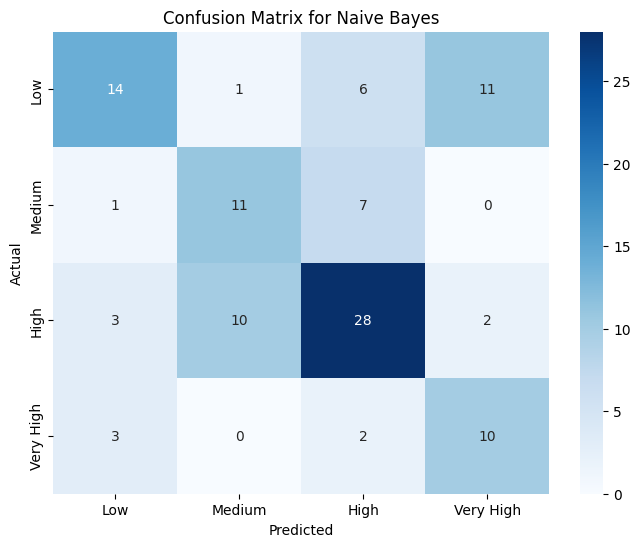

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=price_labels, yticklabels=price_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()